### Forecasting the number of orders based on the international competition Global Manafement Challenge

# Table of contents

1. Abstract
2. About dataset
3. Import librariers
4. Prepare data
5. Exploratory data
6. Train Test Split
7. Functions
8. Custom Transformers
9. Pipeline
10. Models
11. Summary

# 1. Abstract

It is a simulation of production company management. It is a simulation of the management of a manufacturing company, in which student and company teams participate. The teams play the role of the company management. The company is listed on the stock exchange. The role of the board is to make decisions based on quarterly reports. The companies operate internationally in three markets:
* European Union
* NAFTA - the United States, Canada and Mexico
* Internet

Teams are divided into up to eight teams. They compete to achieve the highest possible investment result at the end of the simulation. 
Each board makes **75 decisions**, including: production, research and development, sales, recruitment, marketing, investments, credits, dividend payment, issue or purchase of shares. The company produces and sells 3 different products in 3 different markets. 

<img src="graphics/01.jpg" width="550">

Each team receives a report:

* Resources and products

<img src="graphics/02.jpg" width="550">
 
* The financial statements and

<img src="graphics/03.jpg" width="550">
 
* Information about all companies in the group, the market situation and also information requested by the team.

<img src="graphics/04.jpg" width="550">

<img src="graphics/05.jpg" width="550">

<img src="graphics/06.jpg" width="550">

<img src="graphics/07.jpg" width="550">

The most important factor is to maximize profit. This is done by selling products. By delivering more products than the customers actually order, we create stocks that we have to store, thus increasing losses, because the products produced by our company do not create added value. Another situation is to produce too few products. Therefore, **the most important thing is to forecast the number of products ordered**.

# 2. About dataset

The data set was created from 257 reports. The reports come from previous editions of my team and from the infected ones. Specific features were selected to build models. They were chosen on the basis of their field knowledge.

The reports inside the dataset are:
    - datasets/
        - 01_reports/
            - reports in xlsx files
        - 02_all_reports_data/
        - 03_all_reports_data_current_previous/
        - 04_demand_datasets/
    - graphics/
    - models/
    - scripts/

Each file has a structured name:

<img src="graphics/08.jpg" width="550">

# 3. Import libraries

Import of the necessery modules

In [1]:
# error display
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# pipeline construction
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder

# models trainng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# optimization of hyperparameters
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, partial, space_eval
from sklearn.model_selection import cross_val_score

# model evaluation
import sklearn.metrics as metrics

# saving models
import pickle

# settings
pd.set_option('display.max_columns', None)
pio.renderers.default='notebook'

# 4. Prepare data

## 4.1 All  Reports Data

From all reports values were taken and created a file **all_reports_data.csv**

<img src="graphics/09.jpg" width="550">

The file was saved here:
    - datasets/
        - 01_reports/
        - 02_all_reports_data/
            - all_reports_data.csv
        - 03_all_reports_data_current_previous/
        - 04_demand_datasets/
    - graphics/
    - models/
    - scripts/

In [2]:
%run -i 'scripts/01_prepare_all_reports_data/prepare_all_reports_data.py'

Number of reports:  417

Loading report  ././datasets/01_reports/17_01_RadwH25.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH26.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH27.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH28.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH05.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH06.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH07.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH08.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH09.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH05.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH06.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH07.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH00.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH01.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH02.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH03.xlsx
Loading r

Loading report  ././datasets/01_reports/20_01_DrugiRusekZ1H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H38.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H38.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H38.

Loading report  ././datasets/01_reports/99_99_X01H29.xlsx
Loading report  ././datasets/01_reports/99_99_X02H25.xlsx
Loading report  ././datasets/01_reports/99_99_X02H26.xlsx
Loading report  ././datasets/01_reports/99_99_X02H27.xlsx
Loading report  ././datasets/01_reports/99_99_X02H28.xlsx
Loading report  ././datasets/01_reports/99_99_X02H29.xlsx
Loading report  ././datasets/01_reports/99_99_X03H15.xlsx
Loading report  ././datasets/01_reports/99_99_X03H16.xlsx
Loading report  ././datasets/01_reports/99_99_X03H17.xlsx
Loading report  ././datasets/01_reports/99_99_X03H18.xlsx
Loading report  ././datasets/01_reports/99_99_X03H19.xlsx
Loading report  ././datasets/01_reports/99_99_X04H15.xlsx
Loading report  ././datasets/01_reports/99_99_X04H16.xlsx
Loading report  ././datasets/01_reports/99_99_X04H17.xlsx
Loading report  ././datasets/01_reports/99_99_X04H18.xlsx
Loading report  ././datasets/01_reports/99_99_X04H19.xlsx
Loading report  ././datasets/01_reports/99_99_X05H15.xlsx
Loading report

Loading report  ././datasets/01_reports/99_99_X30H06.xlsx
Loading report  ././datasets/01_reports/99_99_X30H07.xlsx
Loading report  ././datasets/01_reports/99_99_X30H08.xlsx
Loading report  ././datasets/01_reports/99_99_X30H09.xlsx
Loading report  ././datasets/01_reports/99_99_X31H25.xlsx
Loading report  ././datasets/01_reports/99_99_X31H26.xlsx
Loading report  ././datasets/01_reports/99_99_X31H27.xlsx
Loading report  ././datasets/01_reports/99_99_X31H28.xlsx
Loading report  ././datasets/01_reports/99_99_X31H29.xlsx
Loading report  ././datasets/01_reports/99_99_X32H25.xlsx
Loading report  ././datasets/01_reports/99_99_X32H26.xlsx
Loading report  ././datasets/01_reports/99_99_X32H27.xlsx
Loading report  ././datasets/01_reports/99_99_X32H28.xlsx
Loading report  ././datasets/01_reports/99_99_X32H29.xlsx

Task done correctly


## 4.2 All Reports Data -> current and previous

Adding values from the previous cycle.

The file was saved here:
    - datasets/
        - 01_reports/
        - 02_all_reports_data/
        - 03_all_reports_data_current_previous/
            - all_reports_data_current_previous.csv
        - 04_demand_datasets/
    - graphics/
    - models/
    - scripts/

In [3]:
%run -i 'scripts/02_prepare_all_reports_current_previous/prepare_all_reports_current_previous.py'

Task done correctly


## 4.3 Demand Datasets

In this step, variables that affect the number of orders are taken from **all_reports_data_current_previous.csv**. The data is divided into 9 files depending on the product and area, because for them the variables are a little different. Information which variables to choose and how to prepare them was taken from the [blog](https://gmcworld.org/blog/demand-factors) and based on my own knowledge and experience. The functions were not taken because it was assumed that the model would detect them.

<img src="graphics/10.jpg" width="850">

The files was saved here:
    - datasets/
        - 01_reports/
        - 02_all_reports_data/
        - 03_all_reports_data_current_previous/
        - 04_demand_datasets/
            - Prod1_Europe.csv
            - Prod1_Internet.csv
            - Prod1_Nafta.csv
            - Prod2_Europe.csv
            - Prod2_Internet.csv
            - Prod2_Nafta.csv
            - Prod3_Europe.csv
            - Prod3_Internet.csv
            - Prod3_Nafta.csv
    - graphics/
    - models/
    - scripts/

In [4]:
%run -i 'scripts/03_prepare_demand_datasets/prepare_demand_datasets.py'

('Prod1', 'Europe')
Dataset saved!
('Prod1', 'Nafta')
Dataset saved!
('Prod1', 'Internet')
Dataset saved!
('Prod2', 'Europe')
Dataset saved!
('Prod2', 'Nafta')
Dataset saved!
('Prod2', 'Internet')
Dataset saved!
('Prod3', 'Europe')
Dataset saved!
('Prod3', 'Nafta')
Dataset saved!
('Prod3', 'Internet')
Dataset saved!


## 4.4 Data connection

Combine 9 files into one common file.

In [5]:
path = 'datasets/04_demand_datasets/'

### Product 1 Europe

In [6]:
Prod1_Europe = pd.read_csv(f'{path}Prod1_Europe.csv')
Prod1_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1     5.0    15.00         7.0            2   
2  Historia        0      2     5.0    19.00         7.0            3   
3  Historia        0      3     5.0    21.40         7.0            3   
4  Historia        0      4     5.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         100.0   
1       3.0   73333.333333              0   1.55  285.0         115.0   
2       1.0   90000.000000              0   1.60  285.0         115.0   
3       0.0  103333.333333              0   1.65  300.0         115.0   
4       0.0  111666.666667              0   1.70  325.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      285.0        594           0  
2             0.0             0.0      285.0       1210         594  
3             0.0             0.0      300.0       1319        1210  
4             0.0             0.0      325.0        967        1319

### Product 1 Nafta

In [7]:
Prod1_Nafta = pd.read_csv(f'{path}Prod1_Nafta.csv')
Prod1_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         100.0   
1       3.0   73333.333333              0   1.55    0.0         115.0   
2       1.0   90000.000000              0   1.60    0.0         115.0   
3       0.0  103333.333333              0   1.65  290.0         115.0   
4       0.0  111666.666667              0   1.70  335.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      290.0        180           0  
4             0.0             0.0      335.0        157         180

### Product 1 Internet

In [8]:
Prod1_Internet = pd.read_csv(f'{path}Prod1_Internet.csv')
Prod1_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.75    0.0         100.0   
1   73333.333333     0.0              0   1.55    0.0         115.0   
2   90000.000000     0.0              0   1.60    0.0         115.0   
3  103333.333333    15.0              0   1.65    0.0         115.0   
4  111666.666667    15.0              0   1.70  375.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      375.0        238           0

### Product 2 Europe

In [9]:
Prod2_Europe = pd.read_csv(f'{path}Prod2_Europe.csv')
Prod2_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1     5.0    15.00         7.0            2   
2  Historia        0      2     5.0    19.00         7.0            3   
3  Historia        0      3     5.0    21.40         7.0            3   
4  Historia        0      4     5.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.76    0.0         155.0   
1       3.0   73333.333333              0   1.53  450.0         165.0   
2       1.0   90000.000000              0   1.58  450.0         165.0   
3       0.0  103333.333333              0   1.63  450.0         165.0   
4       0.0  111666.666667              7   2.63  490.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      450.0        368           0  
2             0.0             0.0      450.0        684         368  
3             0.0             0.0      450.0        805         684  
4             0.0             0.0      490.0        634         798

### Product 2 Nafta

In [10]:
Prod2_Nafta = pd.read_csv(f'{path}Prod2_Nafta.csv')
Prod2_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.76    0.0         155.0   
1       3.0   73333.333333              0   1.53    0.0         165.0   
2       1.0   90000.000000              0   1.58    0.0         165.0   
3       0.0  103333.333333              0   1.63  440.0         165.0   
4       0.0  111666.666667              0   2.63  490.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      440.0        137           0  
4             0.0             0.0      490.0        141         137

### Product 2 Internet

In [11]:
Prod2_Internet = pd.read_csv(f'{path}Prod2_Internet.csv')
Prod2_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.76    0.0         155.0   
1   73333.333333     0.0              0   1.53    0.0         165.0   
2   90000.000000     0.0              0   1.58    0.0         165.0   
3  103333.333333    15.0              0   1.63    0.0         165.0   
4  111666.666667    15.0              0   2.63  590.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      590.0        162           0

### Product 3 Europe

In [12]:
Prod3_Europe = pd.read_csv(f'{path}Prod3_Europe.csv')
Prod3_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1    10.0    15.00         7.0            2   
2  Historia        0      2    10.0    19.00         7.0            3   
3  Historia        0      3    10.0    21.40         7.0            3   
4  Historia        0      4    10.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         300.0   
1       3.0   73333.333333              0   1.53  680.0         325.0   
2       1.0   90000.000000              0   1.58  680.0         325.0   
3       0.0  103333.333333              0   1.63  690.0         325.0   
4       0.0  111666.666667              0   1.68  700.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      680.0        224           0  
2             0.0             0.0      680.0        388         224  
3             0.0             0.0      690.0        449         388  
4             0.0             0.0      700.0        374         449

### Product 3 Nafta

In [13]:
Prod3_Nafta = pd.read_csv(f'{path}Prod3_Nafta.csv')
Prod3_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         300.0   
1       3.0   73333.333333              0   1.53    0.0         325.0   
2       1.0   90000.000000              0   1.58    0.0         325.0   
3       0.0  103333.333333              0   1.63  680.0         325.0   
4       0.0  111666.666667              6   1.68  725.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      680.0         73           0  
4             0.0             0.0      725.0         75          67

### Product 3 Internet

In [14]:
Prod3_Internet = pd.read_csv(f'{path}Prod3_Internet.csv')
Prod3_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.75    0.0         300.0   
1   73333.333333     0.0              0   1.53    0.0         325.0   
2   90000.000000     0.0              0   1.58    0.0         325.0   
3  103333.333333    15.0              0   1.63    0.0         325.0   
4  111666.666667    15.0              0   1.68  850.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      850.0         92           0

In [15]:
list_of_files = [
    Prod1_Europe, Prod2_Europe, Prod3_Europe,
    Prod1_Nafta, Prod2_Nafta, Prod3_Nafta,
    Prod1_Internet, Prod2_Internet, Prod3_Internet
]

# Product 1
for file in list_of_files[0::3]:
    file['Product'] = 1

# Product 2
for file in list_of_files[1::3]:
    file['Product'] = 2
    
# Product 3
for file in list_of_files[2::3]:
    file['Product'] = 3
    
data_Europe = pd.concat([Prod1_Europe, Prod2_Europe, Prod3_Europe])
data_Nafta = pd.concat([Prod1_Nafta, Prod2_Nafta, Prod3_Nafta])
data_Internet = pd.concat([Prod1_Internet, Prod2_Internet, Prod3_Internet])

data_Europe.drop(['Team', 'MarketShares_c'], axis=1, inplace=True)
data_Nafta.drop(['Team', 'MarketShares_c'], axis=1, inplace=True)
data_Internet.drop(['Team', 'MarketShares_c'], axis=1, inplace=True)

data_Europe = data_Europe[data_Europe['Cycle'] >= 5].reset_index(drop=True)
data_Nafta = data_Nafta[data_Nafta['Cycle'] >= 5].reset_index(drop=True)
data_Internet = data_Internet[data_Internet['Cycle'] >= 5].reset_index(drop=True)

data_Europe = data_Europe[data_Europe['NumOrders'] >= 10].reset_index(drop=True)
data_Nafta = data_Nafta[data_Nafta['NumOrders'] >= 10].reset_index(drop=True)
data_Internet = data_Internet[data_Internet['NumOrders'] >= 10].reset_index(drop=True)

data_Europe['History'] = pd.Categorical(data_Europe['History'])
data_Nafta['History'] = pd.Categorical(data_Nafta['History'])
data_Internet['History'] = pd.Categorical(data_Internet['History'])

data_Europe['Cycle'] = pd.Categorical(data_Europe['Cycle'])
data_Nafta['Cycle'] = pd.Categorical(data_Nafta['Cycle'])
data_Internet['Cycle'] = pd.Categorical(data_Internet['Cycle'])

data_Europe['Product'] = pd.Categorical(data_Europe['Product'])
data_Nafta['Product'] = pd.Categorical(data_Nafta['Product'])
data_Internet['Product'] = pd.Categorical(data_Internet['Product'])

# setting the first column of the explanatory variable
col_name="NumOrders"
first_col_Europe = data_Europe.pop(col_name)
first_col_Nafta = data_Nafta.pop(col_name)
first_col_Internet = data_Internet.pop(col_name)

data_Europe.insert(0, col_name, first_col_Europe)
data_Nafta.insert(0, col_name, first_col_Nafta)
data_Internet.insert(0, col_name, first_col_Internet)

### Europe

In [16]:
with open('graphics/11_df_Europe.html', 'w') as fo:
    fo.write(data_Europe[-1::-100].to_html())
data_Europe

NumOrders History Cycle  DirAdv    CorpAdv  Commission  AgentsDistr  \
0          1386       0     5    30.0  23.704000         7.0            3   
1          1288       0     5     6.0  23.704000         8.0            3   
2           698       0     5    37.0  23.704000        11.0            3   
3          1150       0     5     5.0  23.704000         7.0            3   
4          1213       0     5    10.0  23.704000         8.0            3   
...         ...     ...   ...     ...        ...         ...          ...   
1185        415       3     9    18.0  52.066112        12.0            5   
1186        513       3     9    19.0  48.090112        13.0            7   
1187        544       3     9    23.0  72.890112        13.0            8   
1188        438       3     9    21.0  63.610112        10.0            5   
1189        541       3     9    14.0  62.810112        14.0            7   

      Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0          2.0  136666.666667              0   2.68  340.0         109.0   
1          2.0  116666.666667              0   1.75  300.0         115.0   
2         22.0  211333.333333              0   2.68  428.0         109.0   
3          0.0  116666.666667              0   2.43  325.0         120.0   
4          5.0  120000.000000              0   2.45  345.0         130.0   
...        ...            ...            ...    ...    ...           ...   
1185       7.0  173333.333333              0   3.78  808.0         375.0   
1186      13.0  191666.666667              9   3.38  795.0         330.0   
1187      10.0  233333.333333             12   2.87  757.0         315.0   
1188       9.0  180333.333333             44   4.62  790.0         366.0   
1189      33.0  333333.333333              0   3.19  787.0         340.0   

      MarketShares_p   MeanPrice  NumSales_p Product  
0                0.0  337.800000         967       1  
1                0.0  308.625000         967       1  
2                0.0  364.125000         967       1  
3                0.0  326.375000         967       1  
4                0.0  331.000000         967       1  
...              ...         ...         ...     ...  
1185             0.0  796.571429         394       3  
1186            11.3  814.843750         437       3  
1187            10.5  764.083714         426       3  
1188             0.0  730.500000         340       3  
1189             9.7  801.492089         374       3  

[1190 rows x 17 columns]

### Nafta

In [17]:
with open('graphics/12_df_Nafta.html', 'w') as fo:
    fo.write(data_Nafta[-1::-100].to_html())
data_Nafta

NumOrders History Cycle  DirAdv    CorpAdv  Commission  AgentsDistr  \
0           332       0     5    35.0   9.800000         6.0            1   
1           253       0     5     5.0   9.800000         3.0            1   
2           324       0     5    10.0   9.800000        12.0            1   
3           236       0     5    10.0   9.800000         7.0            1   
4           202       0     5    10.0   9.800000         7.0            1   
...         ...     ...   ...     ...        ...         ...          ...   
1186        252       3     9    18.0  54.902784        11.0            5   
1187        249       3     9    12.0  47.094784        12.0            7   
1188        266       3     9    15.0  56.894784        11.0            5   
1189        227       3     9    15.0  62.614784        10.0            5   
1190        295       3     9     7.0  48.414784        13.0            6   

      Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0          2.0  136666.666667              0   2.68  325.0         109.0   
1          2.0  116666.666667              0   1.75  300.0         115.0   
2         22.0  211333.333333              0   2.68  325.0         109.0   
3          0.0  116666.666667              0   2.43  335.0         120.0   
4          5.0  120000.000000              0   2.45  355.0         130.0   
...        ...            ...            ...    ...    ...           ...   
1186       7.0  173333.333333              0   3.78  818.0         375.0   
1187      13.0  191666.666667              0   3.38  819.0         330.0   
1188      10.0  233333.333333              0   2.87  752.0         315.0   
1189       9.0  180333.333333             37   4.62  805.0         366.0   
1190      33.0  333333.333333              0   3.19  777.0         340.0   

      MarketShares_p   MeanPrice  NumSales_p Product  
0                0.0  339.800000         157       1  
1                0.0  315.500000         157       1  
2                0.0  346.125000         157       1  
3                0.0  339.125000         157       1  
4                0.0  342.000000         157       1  
...              ...         ...         ...     ...  
1186             0.0  806.142857         215       3  
1187            10.8  817.734727         227       3  
1188            10.0  771.103715         218       3  
1189             0.0  730.166667         172       3  
1190             9.1  807.528814         191       3  

[1191 rows x 17 columns]

### Internet

In [18]:
with open('graphics/13_df_Internet.html', 'w') as fo:
    fo.write(data_Internet[-1::-100].to_html())
data_Internet

NumOrders History Cycle  DirAdv     CorpAdv  Support  FailedVisits  \
0          1021       0     5    10.0   16.000000     13.0           0.1   
1           626       0     5     5.0   16.000000     11.0           0.1   
2           583       0     5    29.0   16.000000     20.0           0.1   
3           794       0     5    10.0   16.000000     15.0           0.5   
4           577       0     5    10.0   16.000000     15.0           0.1   
...         ...     ...   ...     ...         ...      ...           ...   
1182        378       3     9    20.0   54.424832     20.0           0.1   
1183        409       3     9    20.0   76.560832     30.0           0.1   
1184        468       3     9    20.0  130.176832     20.0           0.0   
1185        416       3     9    22.0   70.248832     20.0           0.0   
1186        487       3     9    29.0   83.368832     30.0           0.0   

      Training    ManagBudget  WebDev  BacklogOrders  RandD  Price  \
0          2.0  136666.666667    20.0              0   2.68  335.0   
1          2.0  116666.666667    25.0              0   1.75  350.0   
2         22.0  211333.333333    20.0              0   2.68  439.0   
3          0.0  116666.666667    25.0              0   2.43  350.0   
4          5.0  120000.000000    25.0              0   2.45  395.0   
...        ...            ...     ...            ...    ...    ...   
1182       7.0  173333.333333    30.0              1   3.78  828.0   
1183      13.0  191666.666667    30.0              0   3.38  794.0   
1184      10.0  233333.333333    20.0             43   2.87  762.0   
1185       9.0  180333.333333    15.0              9   4.62  810.0   
1186      33.0  333333.333333    26.0              0   3.19  798.0   

      AssemblyTime  MarketShares_p   MeanPrice  NumSales_p Product  
0            109.0             0.0  378.800000         238       1  
1            115.0             0.0  349.875000         238       1  
2            109.0             0.0  390.250000         238       1  
3            120.0             0.0  369.125000         238       1  
4            130.0             0.0  384.000000         238       1  
...            ...             ...         ...         ...     ...  
1182         375.0             0.0  759.571429         370       3  
1183         330.0            11.5  811.963255         345       3  
1184         315.0            12.1  770.492167         369       3  
1185         366.0             0.0  770.166667         350       3  
1186         340.0            10.9  823.985175         309       3  

[1187 rows x 18 columns]

# 5. Exploratory

## 5.1 Info

### Europe

In [19]:
data_Europe.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NumOrders       1190 non-null   int64   
 1   History         1190 non-null   category
 2   Cycle           1190 non-null   category
 3   DirAdv          1190 non-null   float64 
 4   CorpAdv         1190 non-null   float64 
 5   Commission      1190 non-null   float64 
 6   AgentsDistr     1190 non-null   int64   
 7   Training        1190 non-null   float64 
 8   ManagBudget     1190 non-null   float64 
 9   BacklogOrders   1190 non-null   int64   
 10  RandD           1190 non-null   float64 
 11  Price           1190 non-null   float64 
 12  AssemblyTime    1190 non-null   float64 
 13  MarketShares_p  1190 non-null   float64 
 14  MeanPrice       1190 non-null   float64 
 15  NumSales_p      1190 non-null   int64   
 16  Product         1190 non-null   category
dtypes: category(3)

### Nafta

In [20]:
data_Nafta.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NumOrders       1191 non-null   int64   
 1   History         1191 non-null   category
 2   Cycle           1191 non-null   category
 3   DirAdv          1191 non-null   float64 
 4   CorpAdv         1191 non-null   float64 
 5   Commission      1191 non-null   float64 
 6   AgentsDistr     1191 non-null   int64   
 7   Training        1191 non-null   float64 
 8   ManagBudget     1191 non-null   float64 
 9   BacklogOrders   1191 non-null   int64   
 10  RandD           1191 non-null   float64 
 11  Price           1191 non-null   float64 
 12  AssemblyTime    1191 non-null   float64 
 13  MarketShares_p  1191 non-null   float64 
 14  MeanPrice       1191 non-null   float64 
 15  NumSales_p      1191 non-null   int64   
 16  Product         1191 non-null   category
dtypes: category(3)

### Internet

In [21]:
data_Internet.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NumOrders       1187 non-null   int64   
 1   History         1187 non-null   category
 2   Cycle           1187 non-null   category
 3   DirAdv          1187 non-null   float64 
 4   CorpAdv         1187 non-null   float64 
 5   Support         1187 non-null   float64 
 6   FailedVisits    1187 non-null   float64 
 7   Training        1187 non-null   float64 
 8   ManagBudget     1187 non-null   float64 
 9   WebDev          1187 non-null   float64 
 10  BacklogOrders   1187 non-null   int64   
 11  RandD           1187 non-null   float64 
 12  Price           1187 non-null   float64 
 13  AssemblyTime    1187 non-null   float64 
 14  MarketShares_p  1187 non-null   float64 
 15  MeanPrice       1187 non-null   float64 
 16  NumSales_p      1187 non-null   int64   
 17  Product       

## 5.2 Describe

### Europe

In [22]:
with open('graphics/14_df_info_Europe.html', 'w') as fo:
    fo.write(data_Europe.describe().to_html())
data_Europe.describe() 

NumOrders       DirAdv      CorpAdv   Commission  AgentsDistr  \
count  1190.000000  1190.000000  1190.000000  1190.000000  1190.000000   
mean    989.758824    22.610084    61.186855    10.799160     5.356303   
std     659.730568    13.475988    36.551111     2.635878     1.827950   
min      90.000000     3.000000    19.832038     6.000000     3.000000   
25%     453.250000    13.000000    34.584000     8.000000     4.000000   
50%     812.000000    20.000000    55.139200    12.000000     5.000000   
75%    1279.750000    30.000000    73.339200    13.000000     7.000000   
max    4314.000000    80.000000   201.510144    15.000000    12.000000   

          Training    ManagBudget  BacklogOrders        RandD        Price  \
count  1190.000000    1190.000000    1190.000000  1190.000000  1190.000000   
mean     21.352941  199365.266106      42.195798     2.990975   535.244538   
std      17.754606   68650.454317      92.857865     0.906260   191.708120   
min       0.000000  116666.666667       0.000000     0.980000   265.000000   
25%       4.000000  145000.000000       0.000000     2.410000   339.000000   
50%      18.000000  175000.000000       0.000000     2.780000   500.000000   
75%      35.000000  240000.000000      45.000000     3.660000   725.000000   
max      90.000000  416666.666667     818.000000     5.370000   985.000000   

       AssemblyTime  MarketShares_p    MeanPrice   NumSales_p  
count   1190.000000     1190.000000  1190.000000  1190.000000  
mean     210.805042        4.142353   525.710579   879.182353  
std       94.640459        4.640813   182.195353   571.594192  
min      100.000000        0.000000   217.232099    98.000000  
25%      125.000000        0.000000   334.113527   419.500000  
50%      170.000000        0.000000   498.349174   710.500000  
75%      325.000000        8.475000   719.129937  1076.000000  
max      450.000000       17.000000   869.750000  4106.000000

### Nafta

In [23]:
with open('graphics/15_df_info_Nafta.html', 'w') as fo:
    fo.write(data_Nafta.describe().to_html())
data_Nafta.describe() 

NumOrders       DirAdv      CorpAdv   Commission  AgentsDistr  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000   
mean    470.925273    14.689337    39.224772     9.856423     3.793451   
std     391.943409     9.161807    25.426742     3.219224     1.812466   
min      17.000000     2.000000     9.800000     1.000000     1.000000   
25%     191.000000     9.000000    18.328000     7.000000     2.000000   
50%     334.000000    12.000000    32.716800    11.000000     4.000000   
75%     632.000000    19.000000    55.670080    12.000000     5.000000   
max    2426.000000    65.000000   145.516800    15.000000     8.000000   

          Training    ManagBudget  BacklogOrders        RandD        Price  \
count  1191.000000    1191.000000    1191.000000  1191.000000  1191.000000   
mean     21.370277  199393.786734      26.225021     2.991906   539.796809   
std      17.757226   68628.662096      64.462195     0.906449   193.630135   
min       0.000000  116666.666667       0.000000     0.980000   259.000000   
25%       4.000000  145000.000000       0.000000     2.410000   345.000000   
50%      18.000000  175000.000000       0.000000     2.780000   500.000000   
75%      35.000000  240000.000000      20.000000     3.660000   744.000000   
max      90.000000  416666.666667     712.000000     5.370000   999.000000   

       AssemblyTime  MarketShares_p    MeanPrice   NumSales_p  
count   1191.000000     1191.000000  1191.000000  1191.000000  
mean     210.774979        3.485306   532.246277   373.276238  
std       94.606375        4.779291   186.393451   352.861127  
min      100.000000        0.000000   210.243902    17.000000  
25%      125.000000        0.000000   341.571429   120.000000  
50%      170.000000        0.000000   500.375000   224.000000  
75%      325.000000        7.300000   740.670932   505.000000  
max      450.000000       23.100000   922.250000  2127.000000

### Internet

In [24]:
with open('graphics/16_df_info_Internet.html', 'w') as fo:
    fo.write(data_Internet.describe().to_html())
data_Internet.describe() 

NumOrders       DirAdv      CorpAdv      Support  FailedVisits  \
count  1187.000000  1187.000000  1187.000000  1187.000000   1187.000000   
mean    748.492839    19.984836    65.038709    17.803707      0.557709   
std     564.917501    12.477492    41.488585     6.139694      1.889377   
min      99.000000     2.000000    16.000000     5.000000      0.000000   
25%     347.000000    10.000000    27.156800    12.000000      0.100000   
50%     532.000000    17.000000    62.291200    20.000000      0.100000   
75%     973.000000    25.000000    92.012416    21.000000      0.100000   
max    3323.000000    80.000000   193.593600    42.000000     21.100000   

          Training    ManagBudget       WebDev  BacklogOrders        RandD  \
count  1187.000000    1187.000000  1187.000000    1187.000000  1187.000000   
mean     21.404381  199190.957596    22.402696      40.234204     2.989899   
std      17.747477   68649.427568     7.891631      84.728347     0.905279   
min       0.000000  116666.666667     0.000000       0.000000     0.980000   
25%       4.000000  145000.000000    17.000000       0.000000     2.410000   
50%      18.000000  173333.333333    20.000000       0.000000     2.780000   
75%      35.000000  238333.333333    25.000000      40.500000     3.660000   
max      90.000000  416666.666667    65.000000     660.000000     5.370000   

             Price  AssemblyTime  MarketShares_p    MeanPrice   NumSales_p  
count  1187.000000   1187.000000     1187.000000  1187.000000  1187.000000  
mean    569.472620    210.834878        4.856108   569.039454   586.618366  
std     207.588462     94.620257        5.634139   201.951552   506.774020  
min     264.000000    100.000000        0.000000   215.463259     2.000000  
25%     375.000000    125.000000        0.000000   375.187500   227.500000  
50%     527.000000    170.000000        0.000000   542.250000   381.000000  
75%     785.000000    325.000000       10.200000   794.943641   793.000000  
max     999.000000    450.000000       23.200000   919.500000  2611.000000

## 5.3 Group BY Product

Grouping data by product and area.

### Europe

In [25]:
with open('graphics/17_df_GroupByProduct_Europe.html', 'w') as fo:
    fo.write(data_Europe.groupby(["Product"]).mean().to_html())
data_Europe.groupby(["Product"]).mean()

NumOrders     DirAdv    CorpAdv  Commission  AgentsDistr  \
Product                                                               
1        1671.314861  27.541562  61.202846   10.801008     5.357683   
2         882.131313  22.424242  61.154792   10.795455     5.353535   
3         415.559194  17.863980  61.202846   10.801008     5.357683   

          Training    ManagBudget  BacklogOrders     RandD       Price  \
Product                                                                  
1        21.370277  199393.786734      72.010076  3.255592  323.219144   
2        21.318182  199308.080808      37.848485  3.149520  505.343434   
3        21.370277  199393.786734      16.717884  2.568212  777.095718   

         AssemblyTime  MarketShares_p   MeanPrice   NumSales_p  
Product                                                         
1          120.337531        3.823426  320.520294  1460.979849  
2          172.906566        4.141162  499.500371   790.527778  
3          339.075567        4.462469  757.045050   385.816121

### Nafta

In [26]:
with open('graphics/18_df_GroupByProduct_Nafta.html', 'w') as fo:
    fo.write(data_Nafta.groupby(["Product"]).mean().to_html())
data_Nafta.groupby(["Product"]).mean()

NumOrders     DirAdv    CorpAdv  Commission  AgentsDistr   Training  \
Product                                                                         
1        779.335013  17.183879  39.224772    9.856423     3.793451  21.370277   
2        436.445844  14.722922  39.224772    9.856423     3.793451  21.370277   
3        196.994962  12.161209  39.224772    9.856423     3.793451  21.370277   

           ManagBudget  BacklogOrders     RandD       Price  AssemblyTime  \
Product                                                                     
1        199393.786734      40.551637  3.255592  326.629723    120.337531   
2        199393.786734      24.760705  3.151914  506.443325    172.911839   
3        199393.786734      13.362720  2.568212  786.317380    339.075567   

         MarketShares_p   MeanPrice  NumSales_p  
Product                                          
1              3.129723  324.866865  615.204030  
2              3.529471  500.792230  347.821159  
3              3.796725  771.079735  156.803526

### Internet

In [27]:
with open('graphics/19_df_GroupByProduct_Internet.html', 'w') as fo:
    fo.write(data_Internet.groupby(["Product"]).mean().to_html())
data_Internet.groupby(["Product"]).mean()

NumOrders     DirAdv    CorpAdv    Support  FailedVisits  \
Product                                                               
1        1266.225316  23.946835  65.003515  17.800000      0.558481   
2         672.906566  19.866162  65.056262  17.805556      0.557323   
3         307.654040  16.151515  65.056262  17.805556      0.557323   

          Training    ManagBudget     WebDev  BacklogOrders     RandD  \
Product                                                                 
1        21.369620  199133.333333  22.410127      69.546835  3.251215   
2        21.421717  199219.696970  22.398990      38.871212  3.149091   
3        21.421717  199219.696970  22.398990      12.358586  2.570051   

              Price  AssemblyTime  MarketShares_p   MeanPrice  NumSales_p  
Product                                                                    
1        340.597468    120.321519        4.556709  342.252219  982.764557  
2        537.012626    172.881313        4.846212  540.225886  527.535354  
3        830.229798    339.073232        5.164646  824.067561  250.555556

## 5.4 BOXPLOTs

A **BOXPLOT** shows the distribution of the data with more detailed information. It shows the outliers more clearly, maximum, minimum, quartile(Q1), third quartile(Q3), interquartile range(IQR), and median.

### Europe

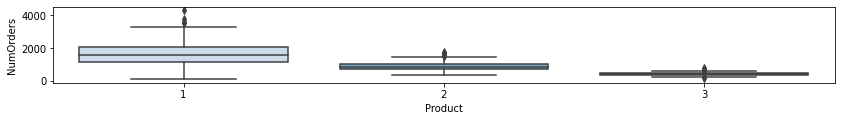

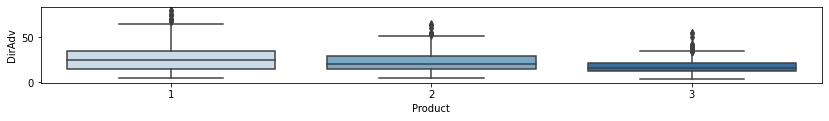

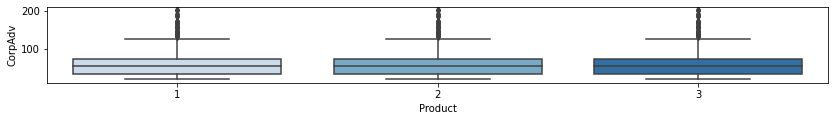

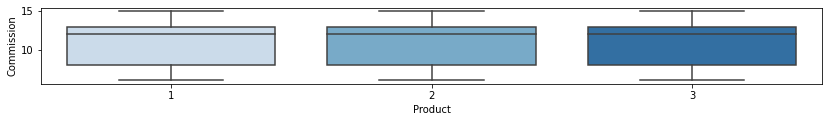

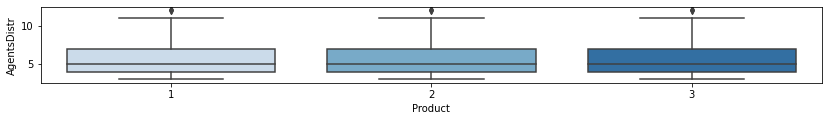

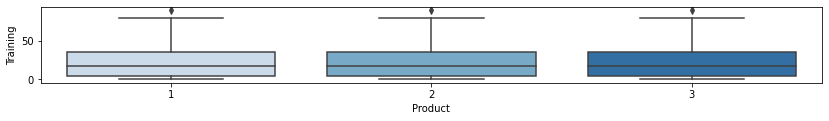

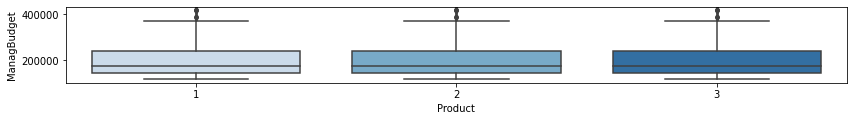

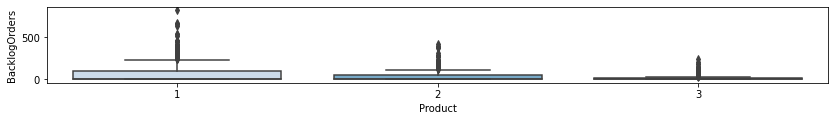

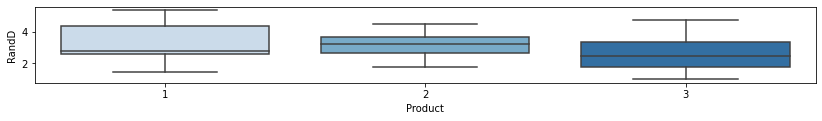

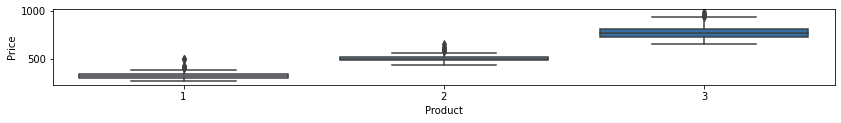

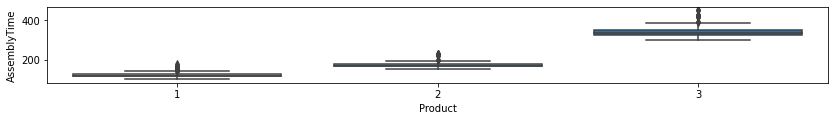

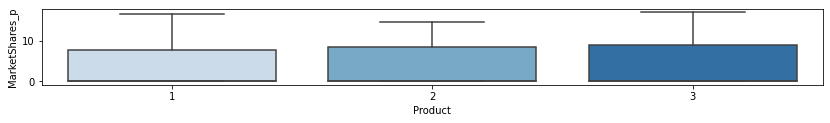

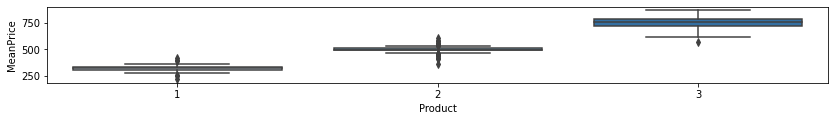

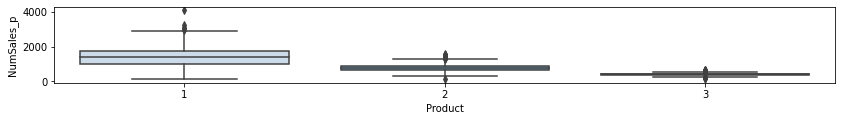

In [28]:
for column in data_Europe.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(14, 1.4))
    data_selected = data_Europe.copy()
    sns.boxplot(x = "Product", y = column, data = data_selected, palette = "Blues")
    plt.xlabel('Product')
    plt.ylabel(f'{column}')
    plt.show()

### Nafta

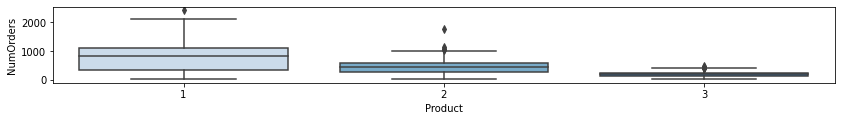

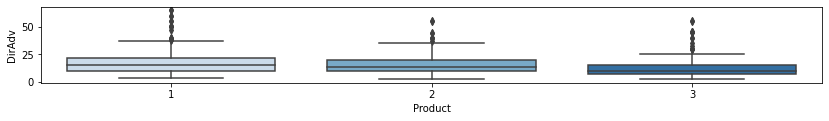

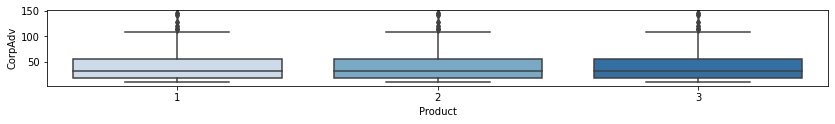

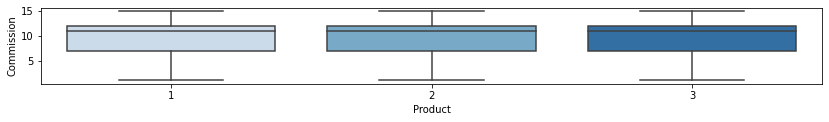

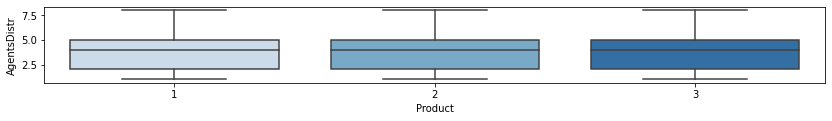

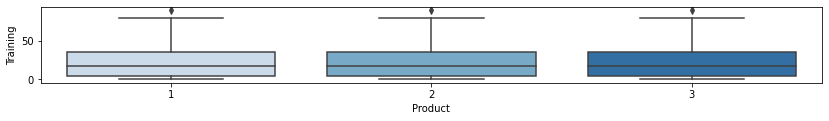

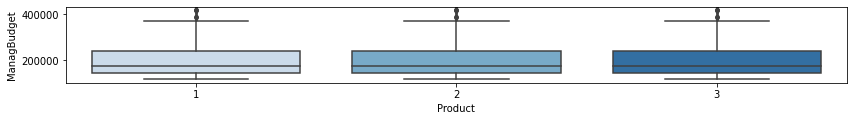

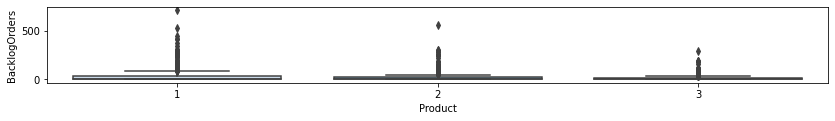

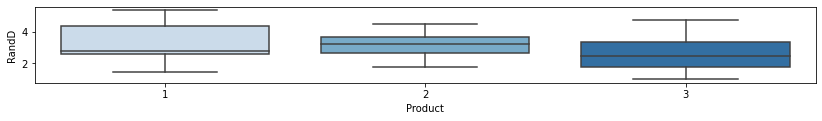

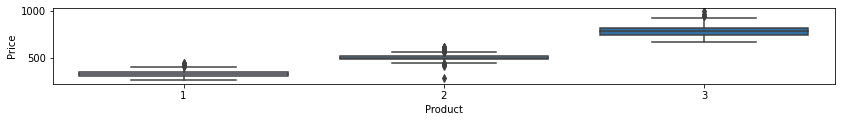

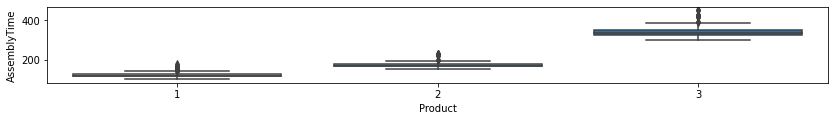

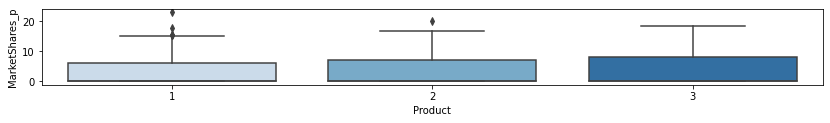

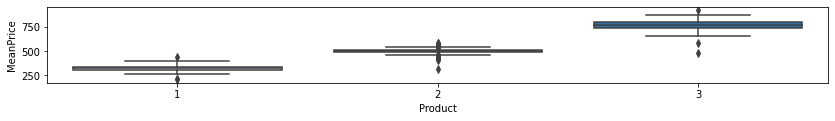

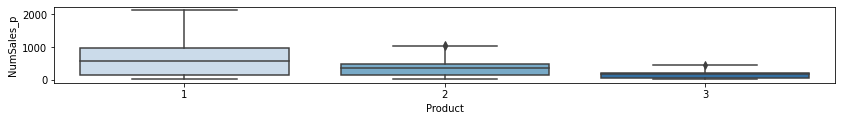

In [29]:
for column in data_Nafta.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(14, 1.4))
    data_selected = data_Nafta.copy()
    sns.boxplot(x = "Product", y = column, data = data_selected, palette = "Blues")
    plt.xlabel('Product')
    plt.ylabel(f'{column}')
    plt.show()

### Internet

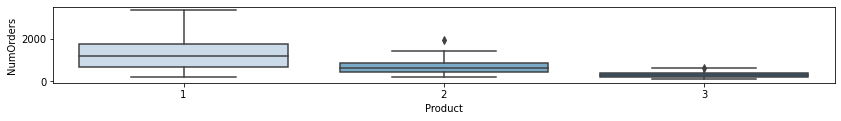

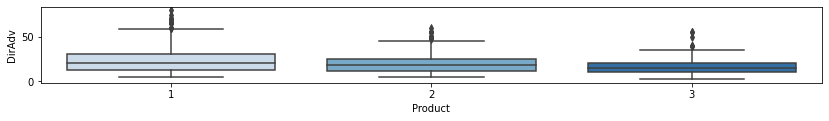

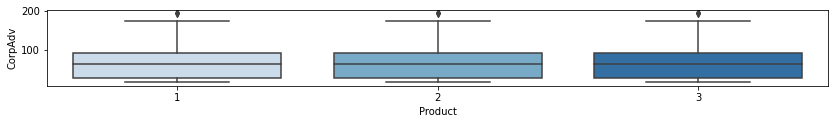

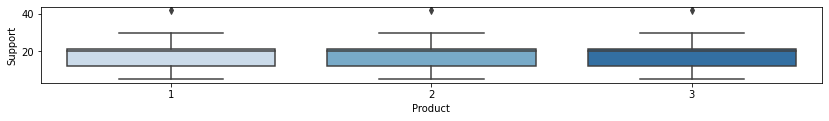

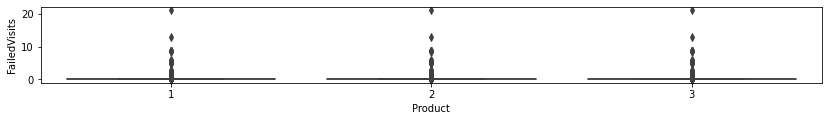

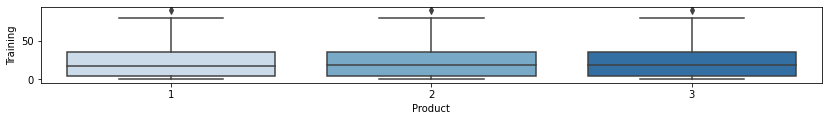

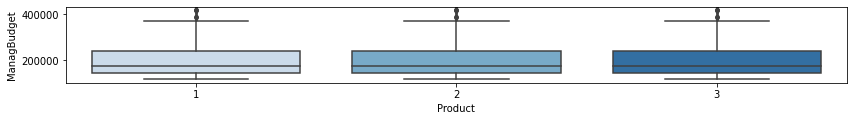

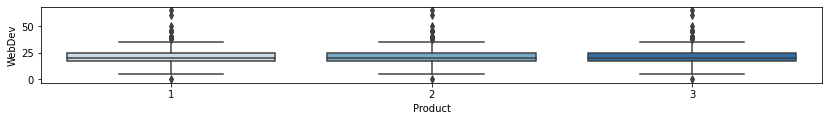

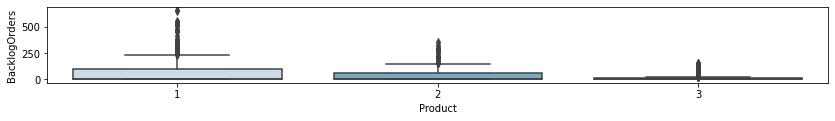

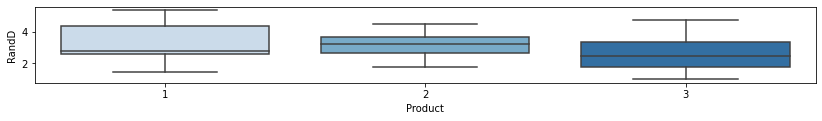

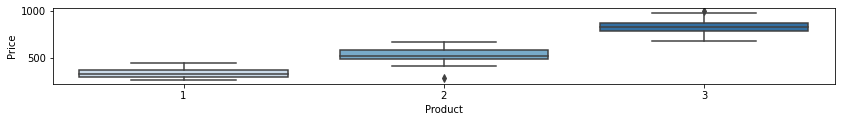

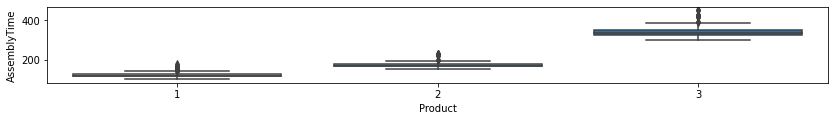

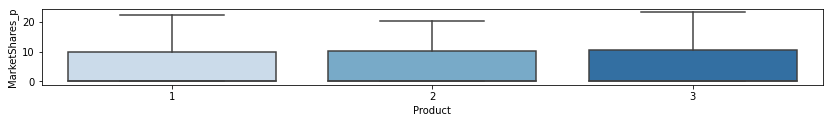

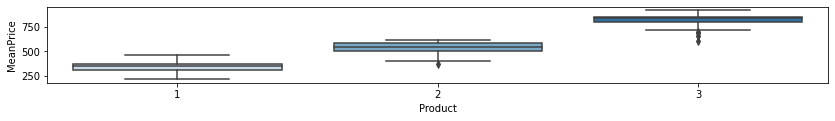

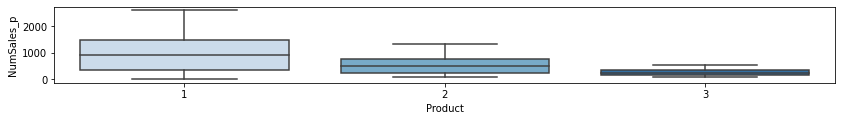

In [30]:
for column in data_Internet.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(14, 1.4))
    data_selected = data_Internet.copy()
    sns.boxplot(x = "Product", y = column, data = data_selected, palette = "Blues")
    plt.xlabel('Product')
    plt.ylabel(f'{column}')
    plt.show()

Some data have outliers, but they are real. This may indicate too few reports.

## 5.5 Frequency for categorical data

### Europe

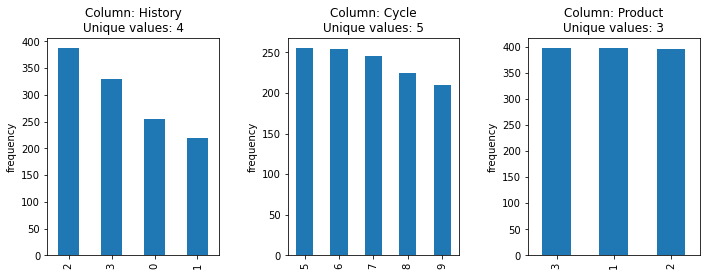

In [31]:
fig = plt.figure(figsize = (16, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for (column, i) in zip(data_Europe.select_dtypes(include=['category']).columns, range(1, 5)):
    ax = fig.add_subplot(1, 4, i)
    data_Europe[column].value_counts().plot.bar()
    plt.title(f'Column: {column}\nUnique values: {len(data_Europe[column].unique())}')
    plt.ylabel('frequency')
plt.savefig('graphics/20_FrequencyCategoricalEurope.png')
plt.show()

### Nafta

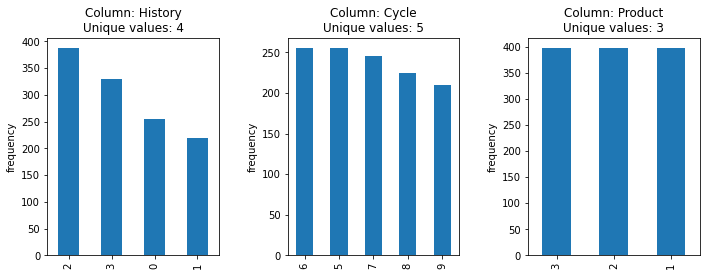

In [32]:
fig = plt.figure(figsize = (16, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for (column, i) in zip(data_Nafta.select_dtypes(include=['category']).columns, range(1, 5)):
    ax = fig.add_subplot(1, 4, i)
    data_Nafta[column].value_counts().plot.bar()
    plt.title(f'Column: {column}\nUnique values: {len(data_Nafta[column].unique())}')
    plt.ylabel('frequency')
plt.savefig('graphics/21_FrequencyCategoricalNafta.png', )
plt.show()

### Internet

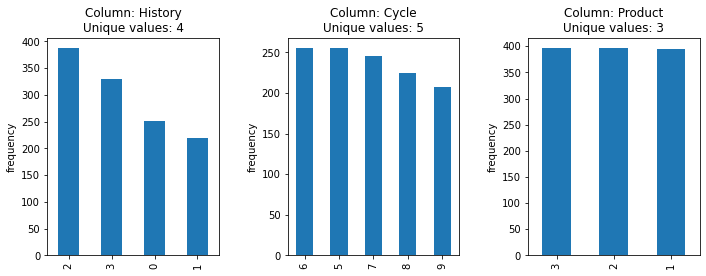

In [33]:
fig = plt.figure(figsize = (16, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for (column, i) in zip(data_Internet.select_dtypes(include=['category']).columns, range(1, 5)):
    ax = fig.add_subplot(1, 4, i)
    data_Internet[column].value_counts().plot.bar()
    plt.title(f'Column: {column}\nUnique values: {len(data_Internet[column].unique())}')
    plt.ylabel('frequency')
plt.savefig('graphics/22_FrequencyCategoricalInternet.png', )
plt.show()

There is more data for history number 3 and there is less data with each subsequent cycle.

## 5.6 Pairplots - Histograms and Scatterplots

### Europe

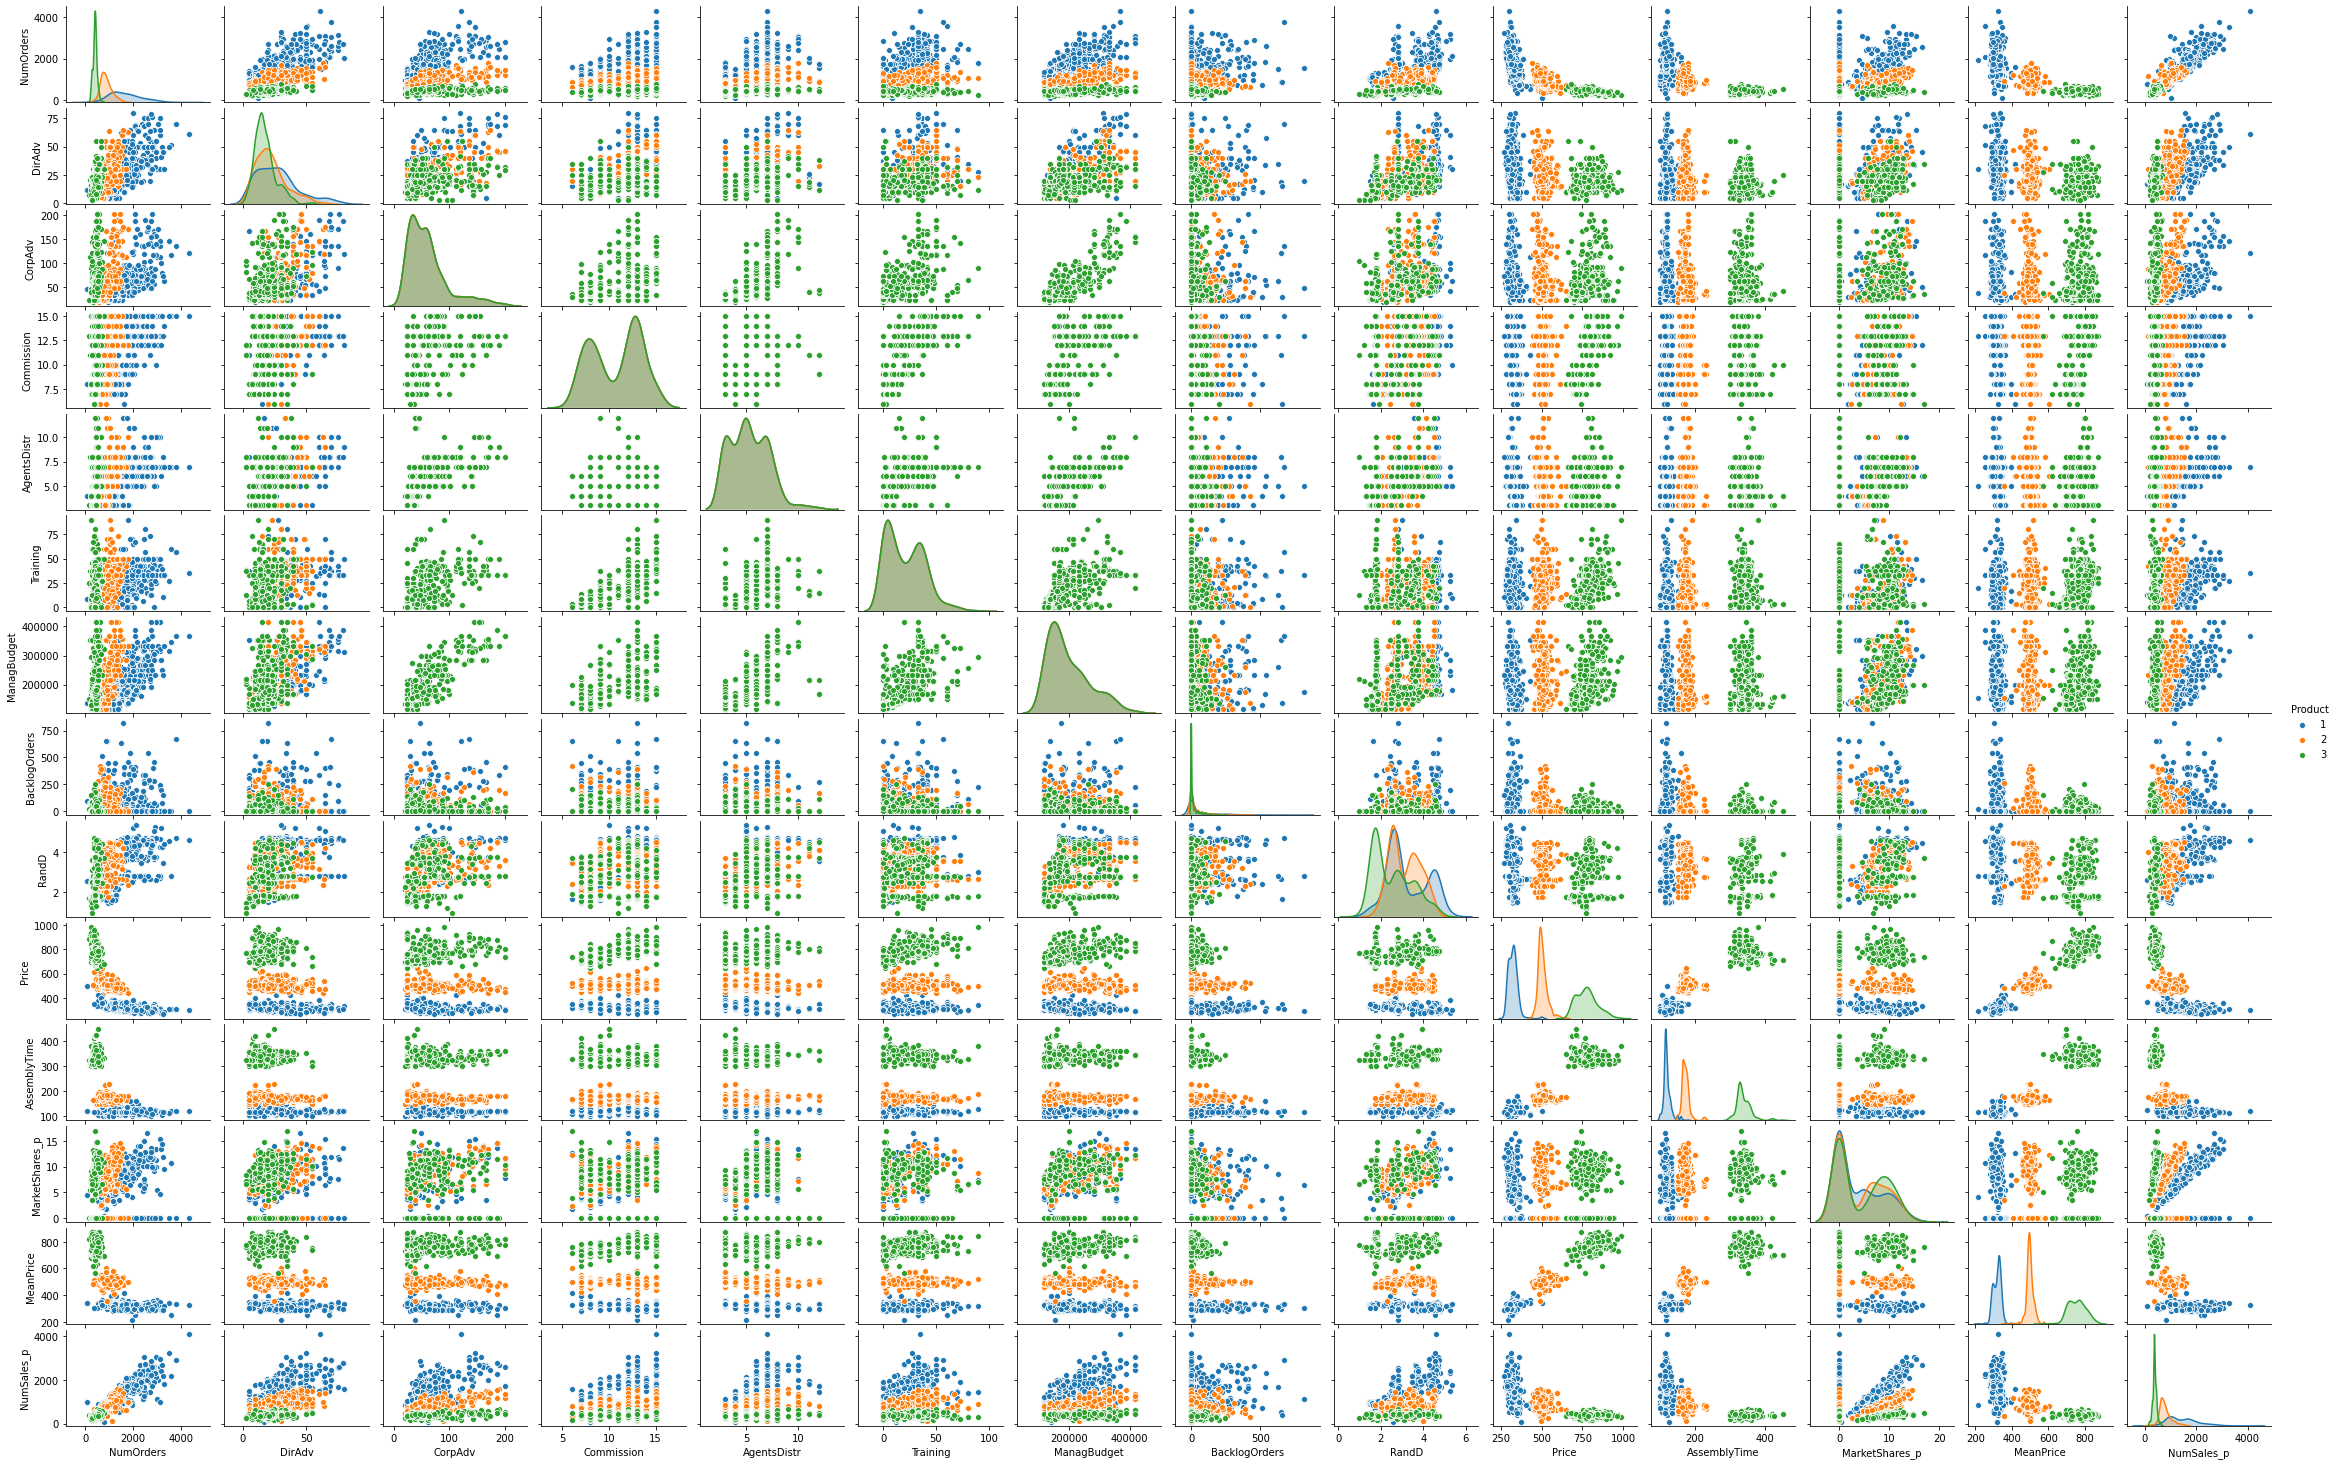

In [34]:
sns_plot = sns.pairplot(data_Europe.drop(columns = ['History', 'Cycle']), hue = 'Product')
sns_plot.fig.set_size_inches(32, 20)
sns_plot.savefig('graphics/23_PairplotEurope.png')

### Nafta

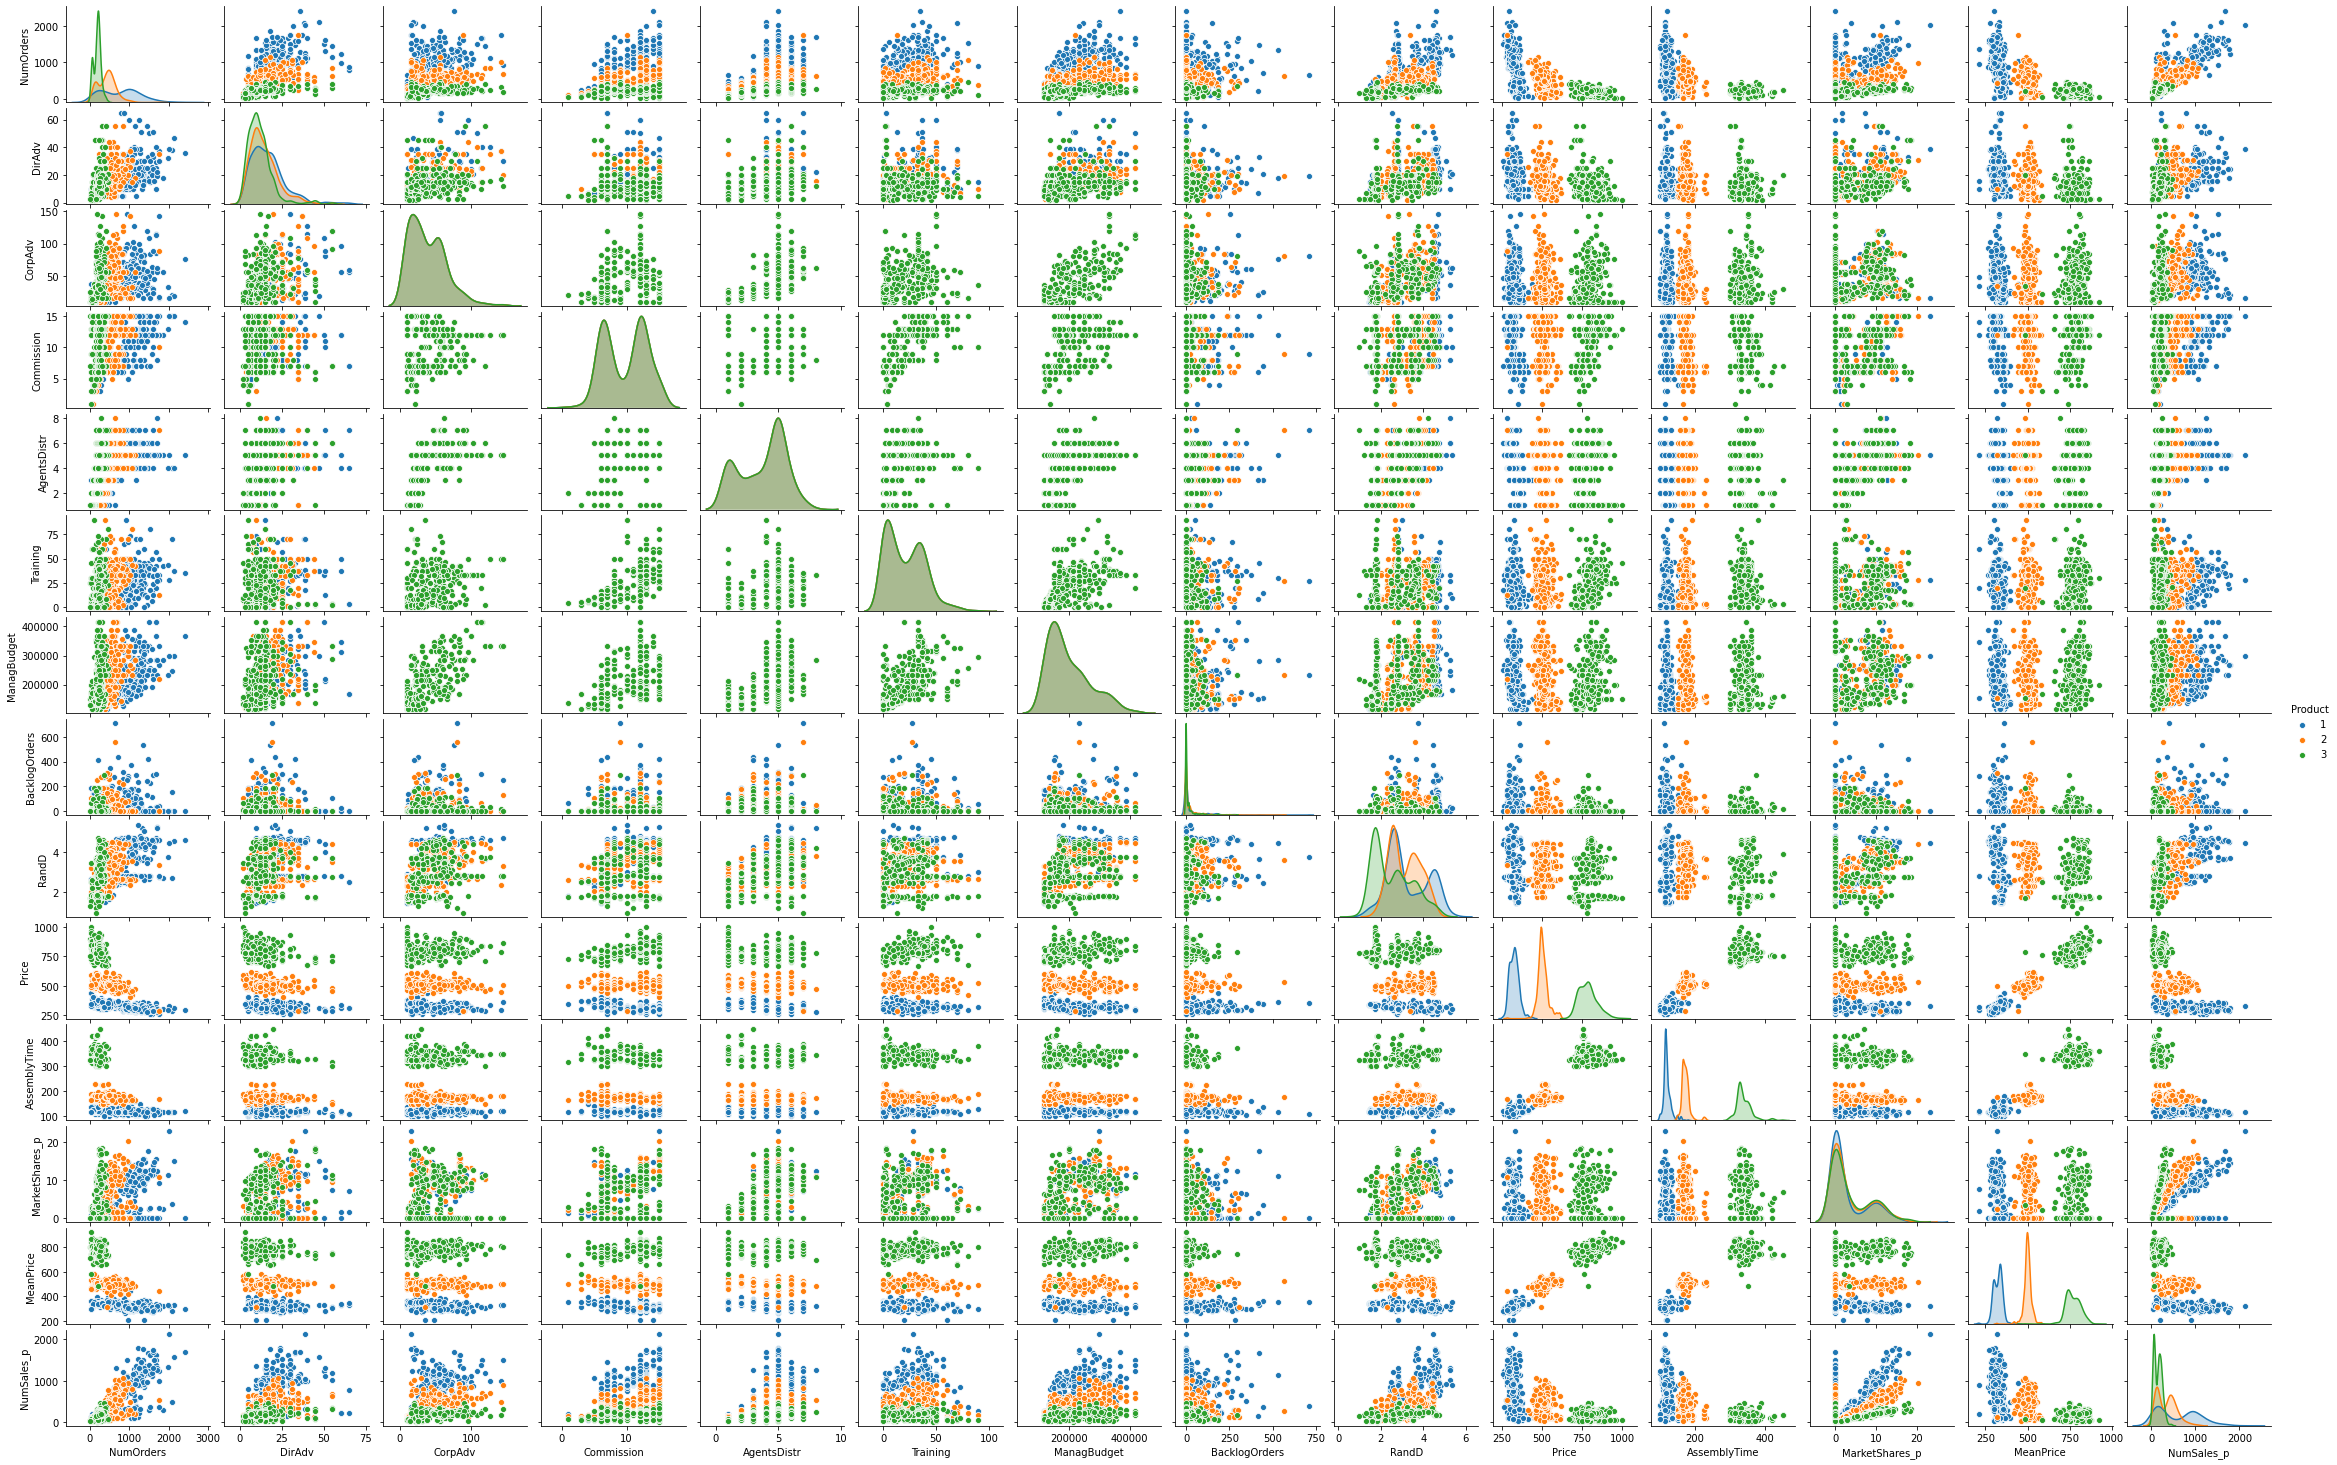

In [35]:
sns_plot = sns.pairplot(data_Nafta.drop(columns = ['History', 'Cycle']), hue = 'Product')
sns_plot.fig.set_size_inches(32, 20)
sns_plot.savefig('graphics/24_PairplotNafta.png')

### Internet

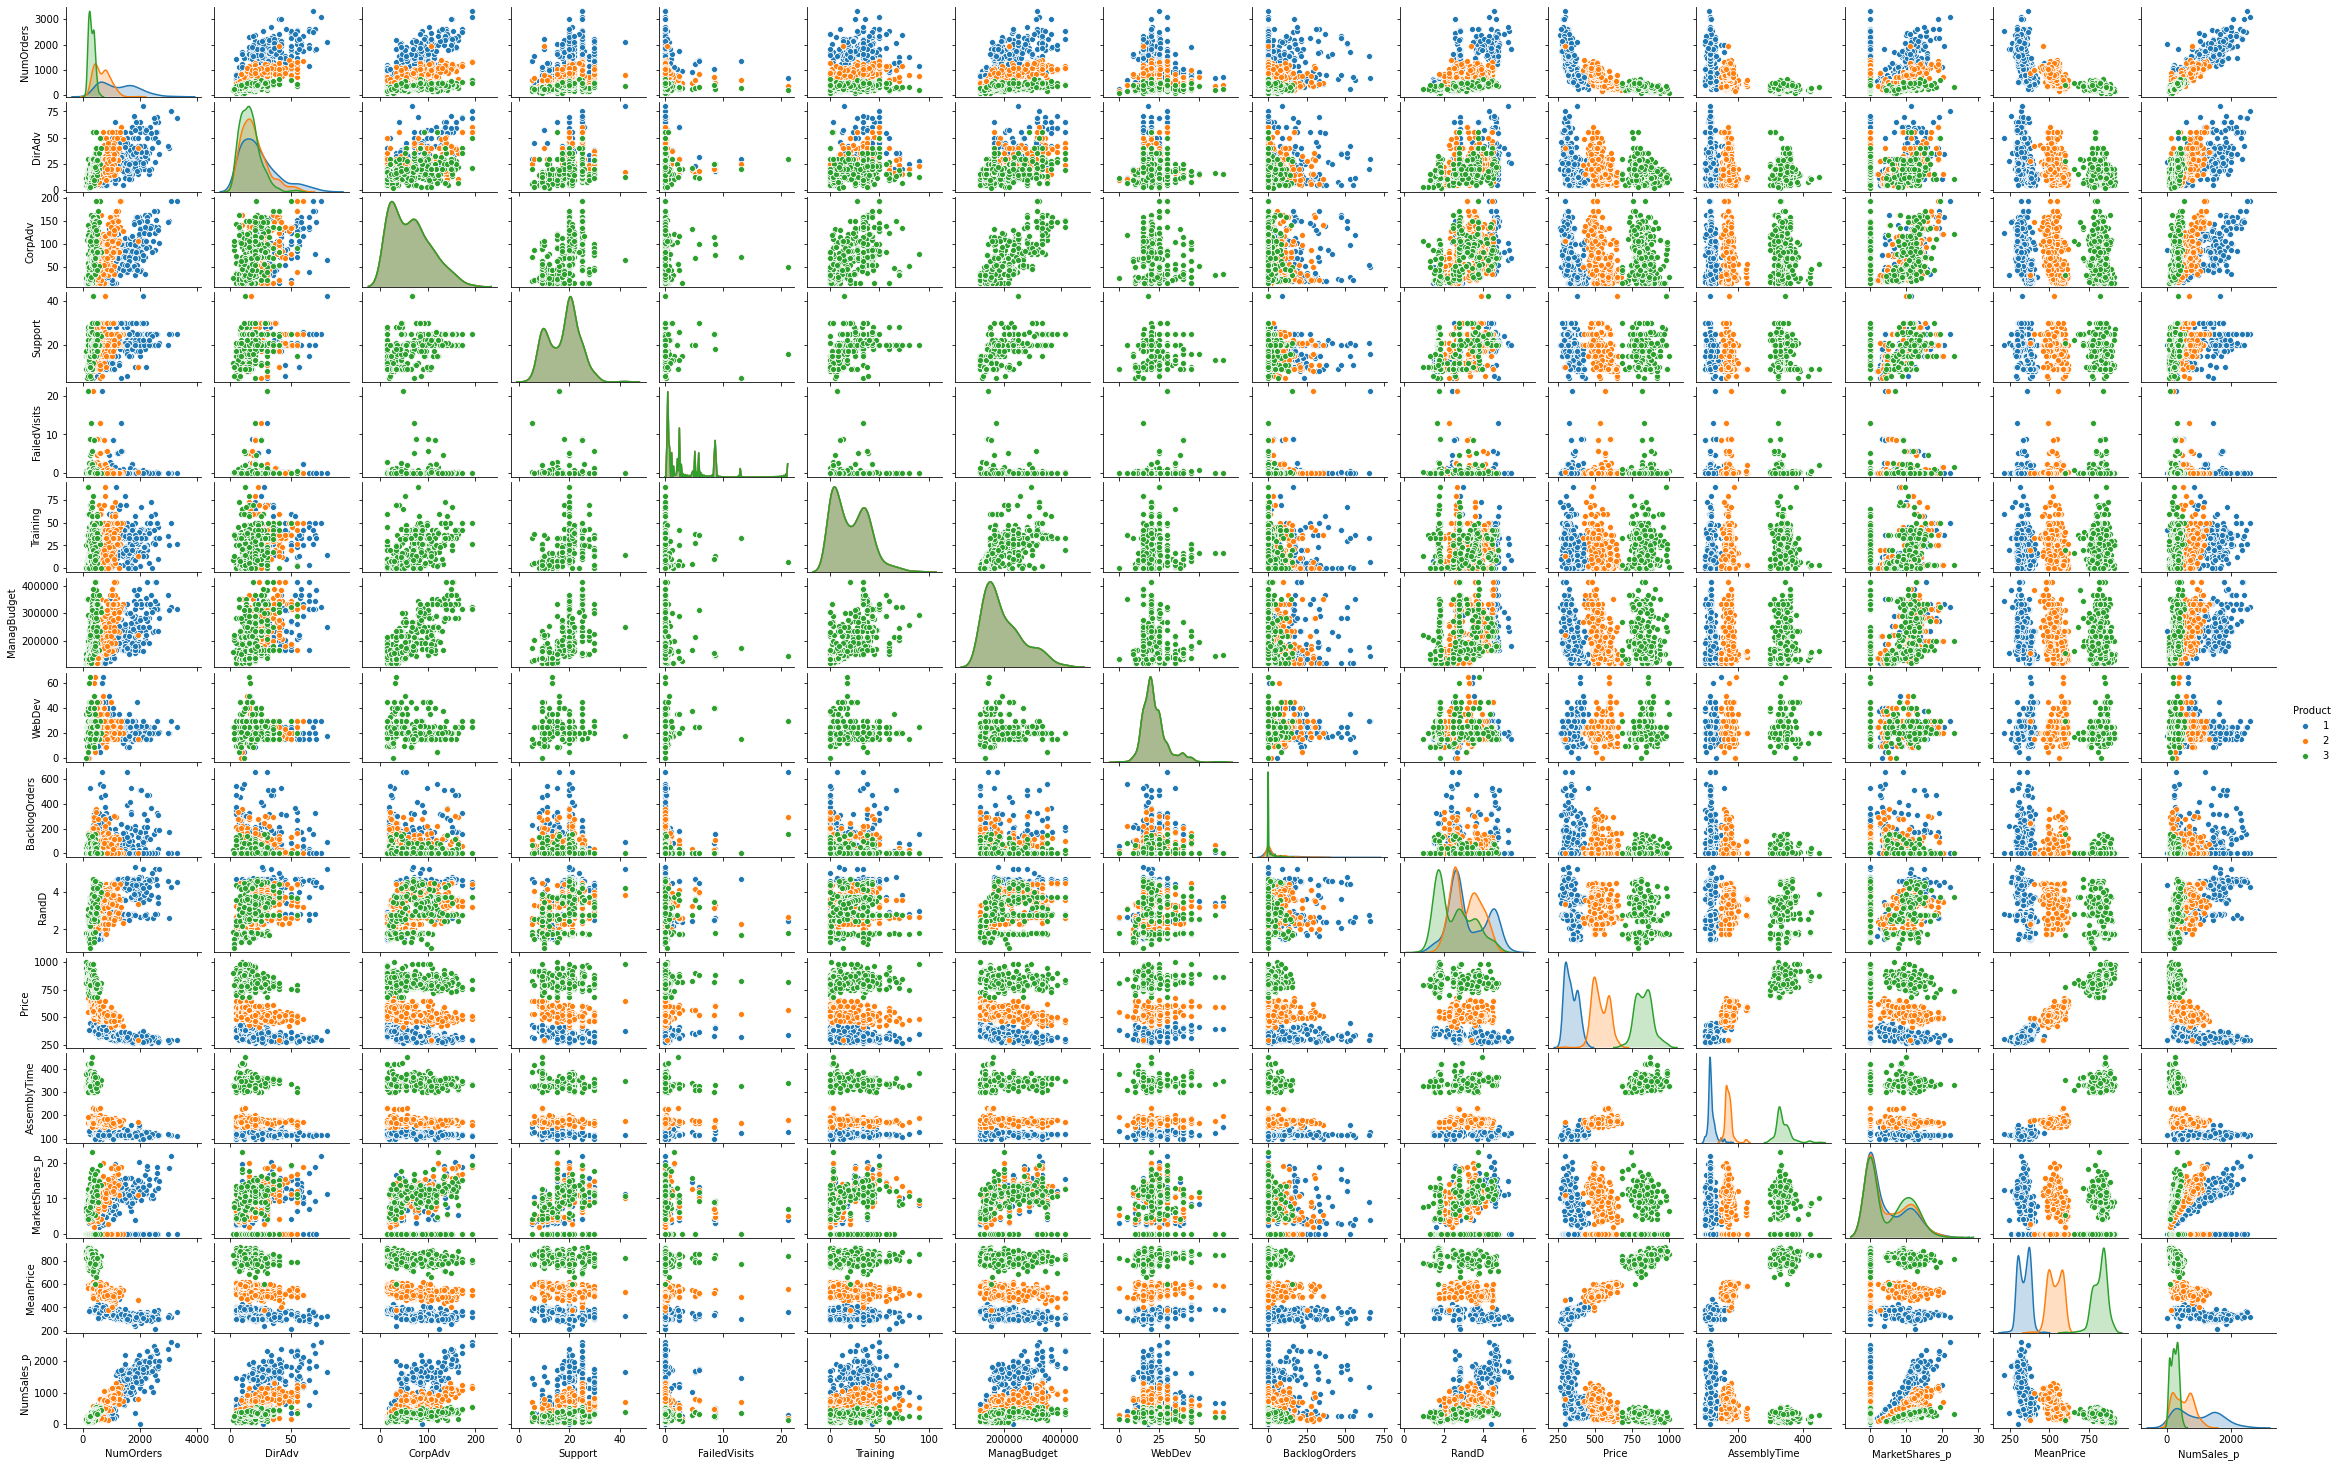

In [36]:
sns_plot = sns.pairplot(data_Internet.drop(columns = ['History', 'Cycle']), hue = 'Product')
sns_plot.fig.set_size_inches(32, 20)
sns_plot.savefig('graphics/25_PairplotInternet.png')

The data is not normal distribution. You can see the division into products. Some data are skewed.

## 5.7 heatmap

### Europe

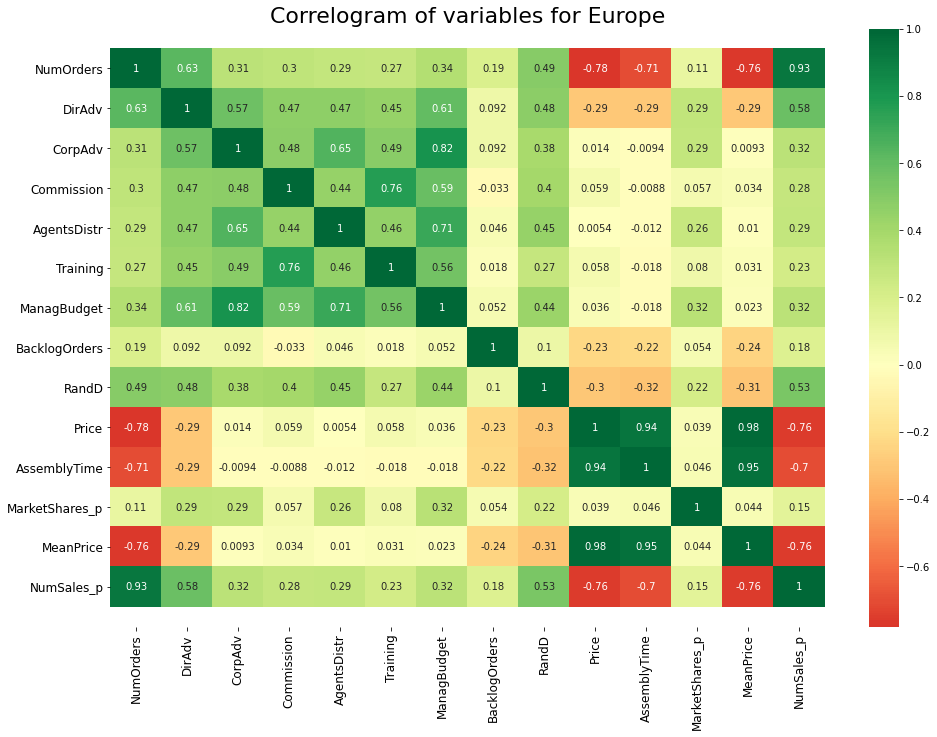

In [37]:
# Plot
plt.figure(figsize=(16, 11))
ax = sns.heatmap(data_Europe.corr(), 
                 xticklabels=data_Europe.corr().columns, 
                 yticklabels=data_Europe.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of variables for Europe', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('graphics/26_HeatmapEurope.png', )
plt.show()

### Nafta

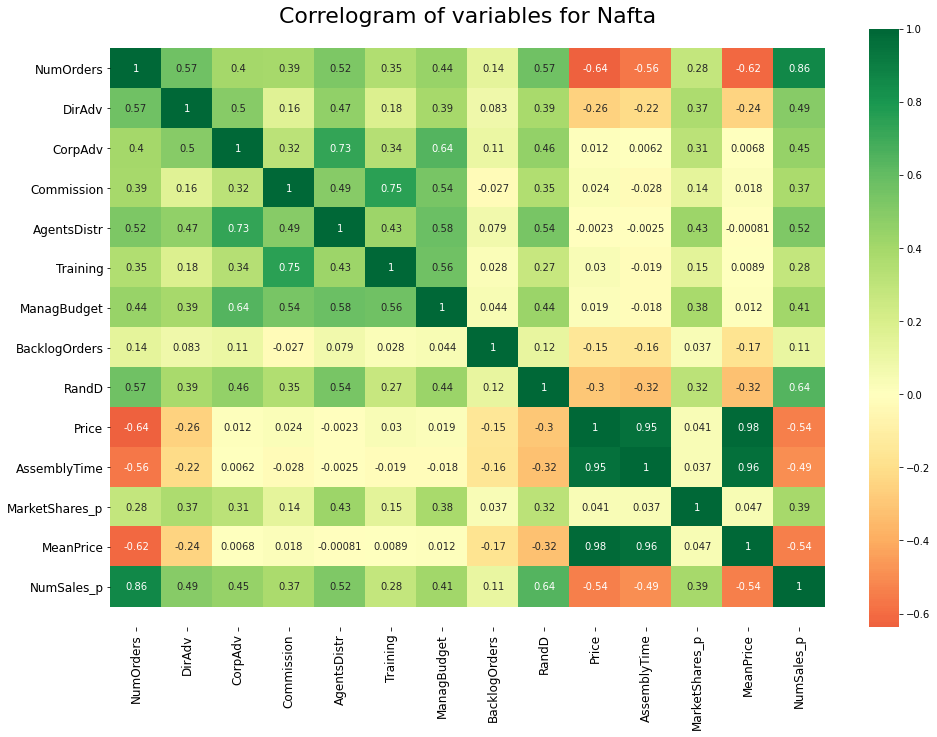

In [38]:
# Plot
plt.figure(figsize=(16, 11))
ax = sns.heatmap(data_Nafta.corr(), 
                 xticklabels=data_Nafta.corr().columns, 
                 yticklabels=data_Nafta.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of variables for Nafta', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('graphics/27_HeatmapNafta.png', )
plt.show()

### Internet

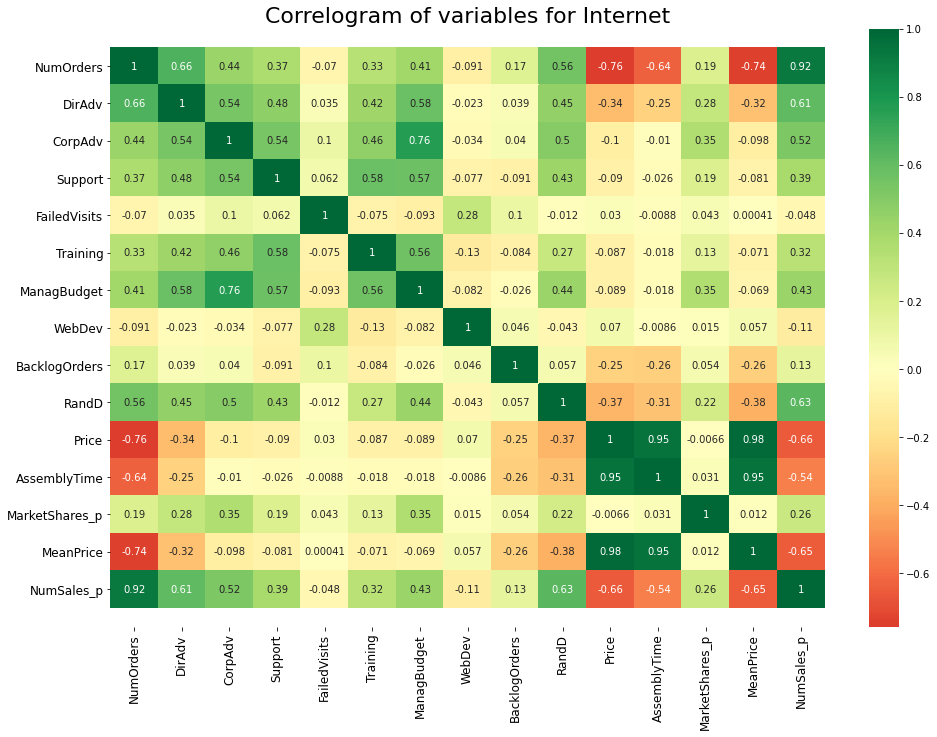

In [39]:
# Plot
plt.figure(figsize=(16, 11))
ax = sns.heatmap(data_Internet.corr(), 
                 xticklabels=data_Internet.corr().columns, 
                 yticklabels=data_Internet.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of variables for Internet', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('graphics/28_HeatmapInternet.png', )
plt.show()

## 5.8 PCA data explanation

### Europa

[0.37247524 0.63405548 0.72176227 0.7928771  0.84316863 0.8902074
 0.9244182  0.94943705 0.96731963 0.98345901 0.99507535 0.99871221
 1.        ]


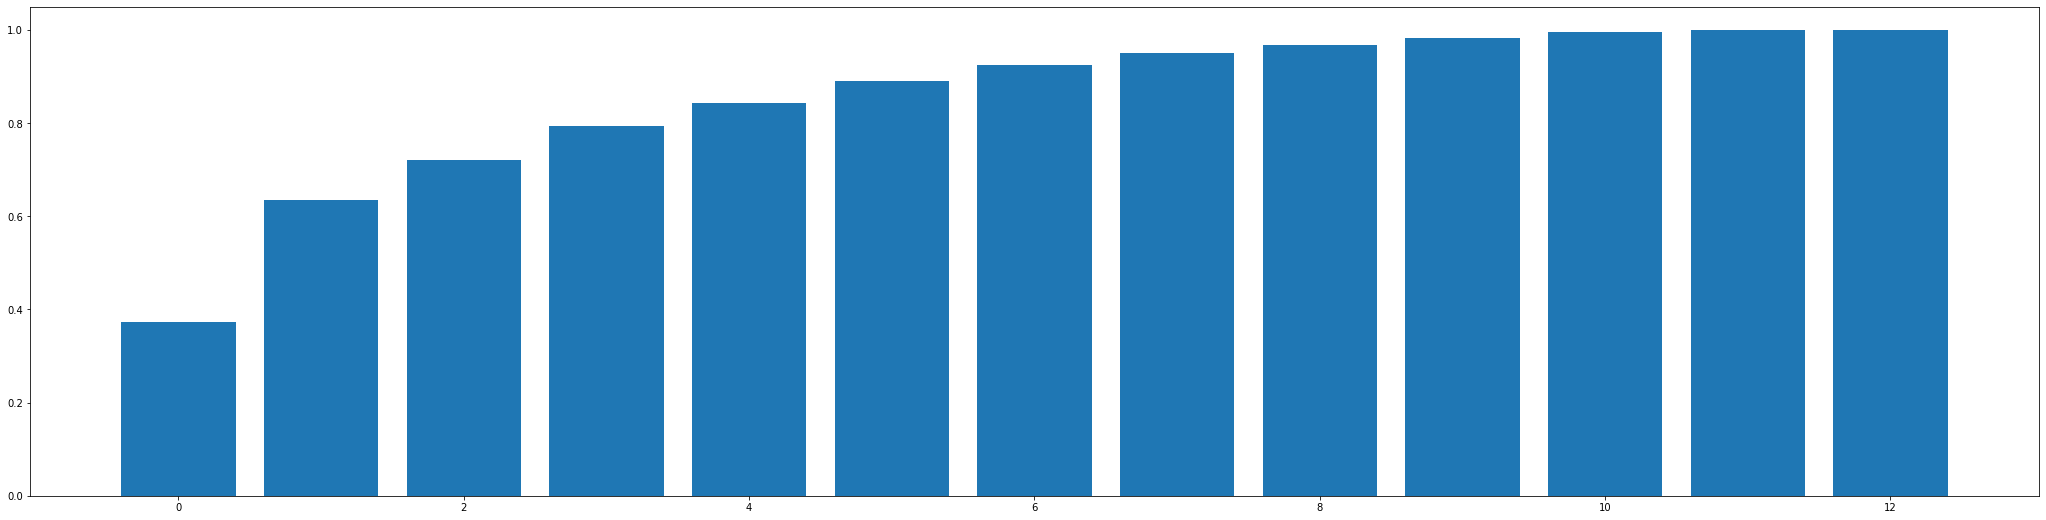

In [40]:
scaled_data = scale(data_Europe.select_dtypes(include=['int64', 'float64']).drop(['NumOrders'], axis=1))
pca_explained_data = PCA()
pca_explained_data.fit(scaled_data)
print(np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.figure(figsize=(36, 9))
plt.bar(range(pca_explained_data.n_components_),np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.savefig('graphics/29_PCAEurope.png')
plt.show()

### Nafta

[0.36111238 0.60136262 0.70182079 0.77604443 0.83032151 0.87766463
 0.91327477 0.94278685 0.96426386 0.98230031 0.9954863  0.99875561
 1.        ]


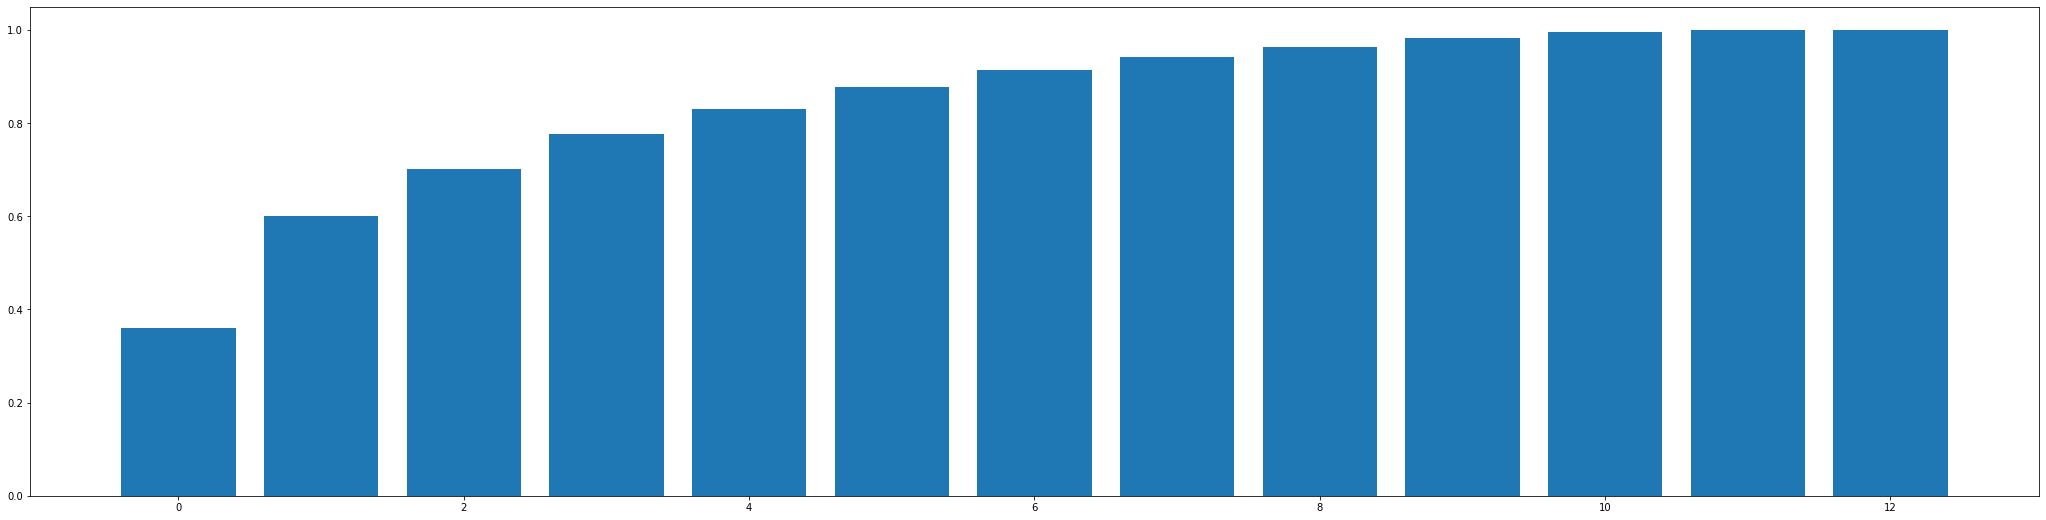

In [41]:
scaled_data = scale(data_Nafta.select_dtypes(include=['int64', 'float64']).drop(['NumOrders'], axis=1))
pca_explained_data = PCA()
pca_explained_data.fit(scaled_data)
print(np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.figure(figsize=(36, 9))
plt.bar(range(pca_explained_data.n_components_),np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.savefig('graphics/30_PCANafta.png')
plt.show()

### Internet

[0.36111238 0.60136262 0.70182079 0.77604443 0.83032151 0.87766463
 0.91327477 0.94278685 0.96426386 0.98230031 0.9954863  0.99875561
 1.        ]


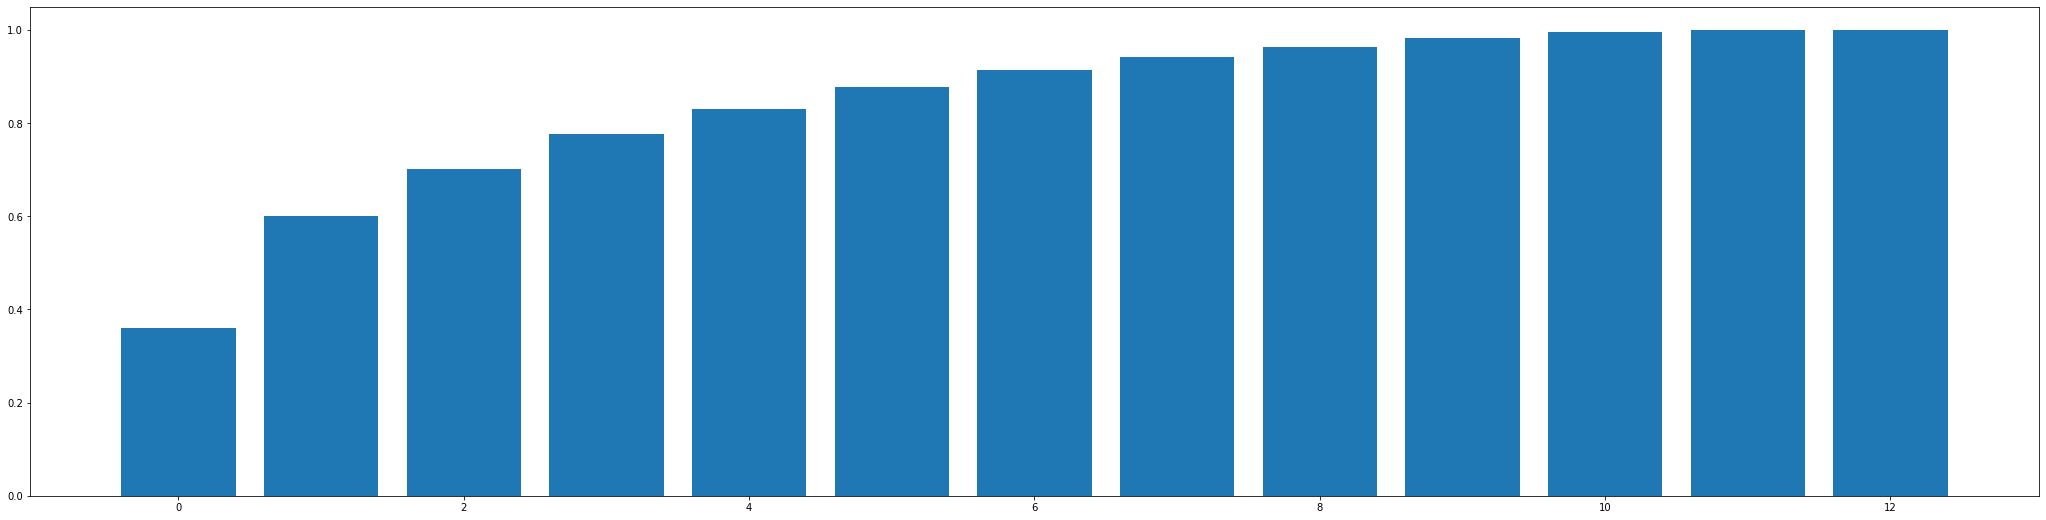

In [42]:
scaled_data = scale(data_Nafta.select_dtypes(include=['int64', 'float64']).drop(['NumOrders'], axis=1))
pca_explained_data = PCA()
pca_explained_data.fit(scaled_data)
print(np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.figure(figsize=(36, 9))
plt.bar(range(pca_explained_data.n_components_),np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.savefig('graphics/31_PCAInternet.png')
plt.show()

You can find dependence on such variables as **advertising**, **previous orders** or **price**, but the greatest influence has information about what **product** is sold.

# 6. Train Test Split

In [43]:
# split data into training and test set
X_train_Europe, X_test_Europe, y_train_Europe, y_test_Europe = train_test_split(data_Europe.drop('NumOrders',
                                                                                                 axis = 1),
                                                                                data_Europe['NumOrders'],
                                                                                test_size = 0.2,
                                                                                random_state = 123)

# split data into training and test set
X_train_Nafta, X_test_Nafta, y_train_Nafta, y_test_Nafta = train_test_split(data_Nafta.drop('NumOrders',
                                                                                             axis = 1),
                                                                            data_Nafta['NumOrders'],
                                                                            test_size = 0.2,
                                                                            random_state = 123)

# split data into training and test set
X_train_Internet, X_test_Internet, y_train_Internet, y_test_Internet = train_test_split(data_Internet.drop('NumOrders',
                                                                                                        axis = 1),
                                                                                        data_Internet['NumOrders'],
                                                                                        test_size = 0.2,
                                                                                        random_state = 123)

# 7. Functions

Functions used to evaluate models and save them.

In [44]:
metrics_data_frame_Europe = pd.DataFrame(columns = [
    'RMSE_train', 'Max_error_train', 'MAPE_train', 'RMSE_test', 'Max_error_test', 'MAPE_test'
])

metrics_data_frame_Nafta = pd.DataFrame(columns = [
    'RMSE_train', 'Max_error_train', 'MAPE_train', 'RMSE_test', 'Max_error_test', 'MAPE_test'
])

metrics_data_frame_Internet = pd.DataFrame(columns = [
    'RMSE_train', 'Max_error_train', 'MAPE_train', 'RMSE_test', 'Max_error_test', 'MAPE_test'
])

def model_evaluation(model, name,
                     X_test, X_train, y_test, y_train, metrics_data_frame, type_df):
    if type_df == 'Europe':
        global metrics_data_frame_Europe
        metrics_data_frame = metrics_data_frame_Europe
    
    elif type_df == 'Nafta':
        global metrics_data_frame_Nafta
        metrics_data_frame = metrics_data_frame_Nafta

    elif type_df == 'Internet':
        global metrics_data_frame_Internet
        metrics_data_frame = metrics_data_frame_Internet
    
    def hist_of_residuals(X, y, set_name):
        errors = model.predict(X) - y
        plt.hist(errors, bins = 100)
        plt.title(f'Histogram of residuals - {set_name} set')
    
    def plot_of_residuals(X, y, set_name):
        errors = model.predict(X) - y
        plt.scatter(x = y, y = errors)
        plt.axhline(0, color="r", linestyle="--")
        plt.xlabel('True Value')
        plt.ylabel('Residual')
        plt.title(f'Plot of residuals - {set_name} set')
    
    def fit_scatter_plot(X, y, set_name):
        y_fitted_values = model.predict(X)

        xmin = y.min()
        xmax = y.max()
        plt.scatter(x = y_fitted_values, y = y)
        x_line = np.linspace(xmin, xmax, 10)
        y_line = x_line
        plt.plot(x_line, y_line, 'r--')
        plt.xlabel('Prediction')
        plt.ylabel('True Value')
        plt.title(f'Plot of predicted values versus true values - {set_name} set')
        
    def calculate_metrics(model = model, name = name,
                          X_test = X_test, X_train = X_train, y_test = y_test, y_train = y_train):
        
        def mean_absolute_percentage_error(y_true, y_pred): 
            y_true, y_pred = y_true.ravel(), y_pred.ravel()
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
        # quality of fit
        fitted_values = model.predict(X_train)
        rmse_train = np.sqrt(metrics.mean_squared_error(y_train, fitted_values))
        max_error_train = np.max(np.abs(fitted_values - y_train))
        mape_train = mean_absolute_percentage_error(y_true = y_train,
                                                    y_pred = fitted_values)

        # quality of prediction
        y_pred = model.predict(X_test)
        rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        max_error_test = np.max(np.abs(y_pred - y_test))
        mape_test = mean_absolute_percentage_error(y_true = y_test,
                                                   y_pred = y_pred)
        
        calculated_metrics = pd.DataFrame({
            'RMSE_train': rmse_train, 'Max_error_train':max_error_train,'MAPE_train': mape_train,
            'RMSE_test': rmse_test, 'Max_error_test':max_error_test, 'MAPE_test': mape_test
        }, index = [name])
                
        return calculated_metrics
    
    fig = plt.figure(figsize = (16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax = fig.add_subplot(3, 2, 1)
    fit_scatter_plot(X = X_train, y = y_train, set_name = 'train')
    
    ax = fig.add_subplot(3, 2, 2)
    fit_scatter_plot(X = X_test, y = y_test, set_name = 'test')
    
    ax = fig.add_subplot(3, 2, 3)
    plot_of_residuals(X = X_train, y = y_train, set_name = 'train')
    
    ax = fig.add_subplot(3, 2, 4)
    plot_of_residuals(X = X_test, y = y_test, set_name = 'test')    

    ax = fig.add_subplot(3, 2, 5)
    hist_of_residuals(X = X_train, y = y_train, set_name = 'train')   

    ax = fig.add_subplot(3, 2, 6)
    hist_of_residuals(X = X_test, y = y_test, set_name = 'test')
    
    metrics_data_frame = metrics_data_frame.append(calculate_metrics())
    
    if type_df == 'Europe':
        metrics_data_frame_Europe = metrics_data_frame
        return metrics_data_frame_Europe
    
    elif type_df == 'Nafta':
        metrics_data_frame_Nafta = metrics_data_frame
        return metrics_data_frame_Nafta

    elif type_df == 'Internet':
        metrics_data_frame_Internet = metrics_data_frame
        return metrics_data_frame_Internet

def save_model(model, name):
    filename = f'models/{name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'The model {name} has been saved')

# 8. Custom Transformers

In [45]:
class CreateDummies(BaseEstimator, TransformerMixin):
    def __init__(self, drop_first = True, columns_to_left = None):
        self.drop_first = drop_first
        self.columns_to_left = columns_to_left
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = pd.DataFrame(X)
        if self.columns_to_left != None:
            X_left = X[self.columns_to_left].astype(int).copy()
        X = pd.get_dummies(X, drop_first = self.drop_first).copy()
        if self.columns_to_left != None: 
            X = pd.concat([X, X_left], axis = 1)
        return X

# pokazac na wykresie wyzej zaleznosci dla Missing data
class ImputeMissingMarketShares_p(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = [
            'MarketShares_p', 'NumSales_p', 
            'History_1', 'History_2', 'History_3',
            'Cycle_6', 'Cycle_7', 'Cycle_8', 'Cycle_9',
            'Product_2', 'Product_3'
        ]
        self.model = None
    
    def fit(self, X, y = None):
        X_fit = X.copy()
        filer_5_cycle = (X_fit['Cycle_6']==0)&(X_fit['Cycle_7']==0)&(X_fit['Cycle_8']==0)&(X_fit['Cycle_9']==0)
        X_fit[filer_5_cycle]['Cycle_6'] = 1
        X_fit = X_fit[X_fit['MarketShares_p'] != 0][self.columns]
        reg_model = LinearRegression()
        reg_model.fit(X_fit.drop(['MarketShares_p'], axis=1),
                      X_fit['MarketShares_p'])
        self.model = reg_model
        return self
    
    def transform(self, X, y = None):
        reg_model = self.model
        filer_5_cycle = (X['Cycle_6']==0)&(X['Cycle_7']==0)&(X['Cycle_8']==0)&(X['Cycle_9']==0)
        X[filer_5_cycle]['Cycle_6'] = 1
        preds = reg_model.predict(X[X['MarketShares_p'] == 0][self.columns].drop(['MarketShares_p'], axis=1))
        X['MarketShares_p'][X['MarketShares_p'] == 0] = preds
        return X

class RemoveUintColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X.drop(list(X.select_dtypes(include=['uint8']).columns), axis=1)

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        def log_transform(x):
            return 0 if x <= 0 else np.log(x)
        
        X = pd.DataFrame(X)
        for col in X:
            X[col] = X[col].apply(log_transform)
        return X

# 9. Pipeline

Application of Transformers using Europe train data.

In [46]:
with open('graphics/32_X_train_Europe.html', 'w') as fo:
    fo.write(X_train_Europe.head().to_html())
X_train_Europe.head()

History Cycle  DirAdv     CorpAdv  Commission  AgentsDistr  Training  \
15        0     5    20.0   23.704000         9.0            3       6.0   
737       3     7    21.0   61.139200        14.0            6      33.0   
171       2     5    12.0   34.584000         8.0            3       3.0   
943       1     9    20.0   58.512038         7.0            5       3.0   
733       3     7    23.0  140.339200        12.0            6      33.0   

       ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  MarketShares_p  \
15   127333.333333              0   2.40  355.0         115.0             0.0   
737  166666.666667              0   2.30  486.0         173.0             9.4   
171  133333.333333              0   2.58  340.0         125.0             0.0   
943  150000.000000             33   3.22  730.0         360.0             0.0   
733  283333.333333              0   4.01  502.0         180.0            10.7   

      MeanPrice  NumSales_p Product  
15   331.250000         967       1  
737  462.524642         854       2  
171  328.750000         971       1  
943  733.125000         445       3  
733  486.323680         842       2

## Categorical Transformer

### Create Dummies

In [47]:
cols_categorical = ['History', 'Cycle', 'Product']
transformer_categorical = Pipeline(steps=[
    ('dummies', CreateDummies(drop_first = True, columns_to_left = None))
])

with open('graphics/33_transformer_categorical_create_dummies.html', 'w') as fo:
    fo.write(transformer_categorical.fit_transform(X_train_Europe[cols_categorical]).head().to_html())

transformer_categorical.fit_transform(X_train_Europe[cols_categorical]).head()

History_1  History_2  History_3  Cycle_6  Cycle_7  Cycle_8  Cycle_9  \
15           0          0          0        0        0        0        0   
737          0          0          1        0        1        0        0   
171          0          1          0        0        0        0        0   
943          1          0          0        0        0        0        1   
733          0          0          1        0        1        0        0   

     Product_2  Product_3  
15           0          0  
737          1          0  
171          0          0  
943          0          1  
733          1          0

## Numerical Transformer

### Create Dummies

In [48]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle']))
])

with open('graphics/34_transformer_numerical_create_dummies.html', 'w') as fo:
    fo.write(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head().to_html())

transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head()

DirAdv     CorpAdv  Commission  AgentsDistr  Training    ManagBudget  \
15     20.0   23.704000         9.0            3       6.0  127333.333333   
737    21.0   61.139200        14.0            6      33.0  166666.666667   
171    12.0   34.584000         8.0            3       3.0  133333.333333   
943    20.0   58.512038         7.0            5       3.0  150000.000000   
733    23.0  140.339200        12.0            6      33.0  283333.333333   

     BacklogOrders  RandD  Price  AssemblyTime  MarketShares_p   MeanPrice  \
15               0   2.40  355.0         115.0             0.0  331.250000   
737              0   2.30  486.0         173.0             9.4  462.524642   
171              0   2.58  340.0         125.0             0.0  328.750000   
943             33   3.22  730.0         360.0             0.0  733.125000   
733              0   4.01  502.0         180.0            10.7  486.323680   

     NumSales_p  History_1  History_2  History_3  Cycle_6  Cycle_7  Cycle_8  \
15          967          0          0          0        0        0        0   
737         854          0          0          1        0        1        0   
171         971          0          1          0        0        0        0   
943         445          1          0          0        0        0        0   
733         842          0          0          1        0        1        0   

     Cycle_9  Product_2  Product_3  Cycle  
15         0          0          0      5  
737        0          1          0      7  
171        0          0          0      5  
943        1          0          1      9  
733        0          1          0      7

### Impute missing MarketShares

In [49]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p())
])

with open('graphics/35_transformer_numerical_impute_missing_MarketShares.html', 'w') as fo:
    fo.write(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head().to_html())

transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head()

DirAdv     CorpAdv  Commission  AgentsDistr  Training    ManagBudget  \
15     20.0   23.704000         9.0            3       6.0  127333.333333   
737    21.0   61.139200        14.0            6      33.0  166666.666667   
171    12.0   34.584000         8.0            3       3.0  133333.333333   
943    20.0   58.512038         7.0            5       3.0  150000.000000   
733    23.0  140.339200        12.0            6      33.0  283333.333333   

     BacklogOrders  RandD  Price  AssemblyTime  MarketShares_p   MeanPrice  \
15               0   2.40  355.0         115.0        5.910015  331.250000   
737              0   2.30  486.0         173.0        9.400000  462.524642   
171              0   2.58  340.0         125.0        3.975928  328.750000   
943             33   3.22  730.0         360.0        9.165691  733.125000   
733              0   4.01  502.0         180.0       10.700000  486.323680   

     NumSales_p  History_1  History_2  History_3  Cycle_6  Cycle_7  Cycle_8  \
15          967          0          0          0        0        0        0   
737         854          0          0          1        0        1        0   
171         971          0          1          0        0        0        0   
943         445          1          0          0        0        0        0   
733         842          0          0          1        0        1        0   

     Cycle_9  Product_2  Product_3  Cycle  
15         0          0          0      5  
737        0          1          0      7  
171        0          0          0      5  
943        1          0          1      9  
733        0          1          0      7

### Remove uint columns

In [50]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer())
])

with open('graphics/36_transformer_numerical_remove_uint_columns.html', 'w') as fo:
    fo.write(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head().to_html())

transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head()

DirAdv     CorpAdv  Commission  AgentsDistr  Training    ManagBudget  \
15     20.0   23.704000         9.0            3       6.0  127333.333333   
737    21.0   61.139200        14.0            6      33.0  166666.666667   
171    12.0   34.584000         8.0            3       3.0  133333.333333   
943    20.0   58.512038         7.0            5       3.0  150000.000000   
733    23.0  140.339200        12.0            6      33.0  283333.333333   

     BacklogOrders  RandD  Price  AssemblyTime  MarketShares_p   MeanPrice  \
15               0   2.40  355.0         115.0        5.910015  331.250000   
737              0   2.30  486.0         173.0        9.400000  462.524642   
171              0   2.58  340.0         125.0        3.975928  328.750000   
943             33   3.22  730.0         360.0        9.165691  733.125000   
733              0   4.01  502.0         180.0       10.700000  486.323680   

     NumSales_p  Cycle  
15          967      5  
737         854      7  
171         971      5  
943         445      9  
733         842      7

### Log Transformer

In [51]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer())
])

with open('graphics/37_transformer_numerical_log_transform.html', 'w') as fo:
    fo.write(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head().to_html())

transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head()

DirAdv   CorpAdv  Commission  AgentsDistr  Training  ManagBudget  \
15   2.995732  3.165644    2.197225     1.098612  1.791759    11.754564   
737  3.044522  4.113153    2.639057     1.791759  3.496508    12.023751   
171  2.484907  3.543391    2.079442     1.098612  1.098612    11.800608   
943  2.995732  4.069233    1.945910     1.609438  1.098612    11.918391   
733  3.135494  4.944062    2.484907     1.791759  3.496508    12.554379   

     BacklogOrders     RandD     Price  AssemblyTime  MarketShares_p  \
15        0.000000  0.875469  5.872118      4.744932        1.776648   
737       0.000000  0.832909  6.186209      5.153292        2.240710   
171       0.000000  0.947789  5.828946      4.828314        1.380258   
943       3.496508  1.169381  6.593045      5.886104        2.215467   
733       0.000000  1.388791  6.218600      5.192957        2.370244   

     MeanPrice  NumSales_p     Cycle  
15    5.802873    6.874198  1.609438  
737   6.136700    6.749931  1.945910  
171   5.795298    6.878326  1.609438  
943   6.597316    6.098074  2.197225  
733   6.186874    6.735780  1.945910

### First Scaler

In [52]:
columns_to_First_Scaler = \
        transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]).head().columns.tolist()

transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler())
])

with open('graphics/38_transformer_numerical_first_scaler.html', 'w') as fo:
    fo.write(pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]),
             columns=columns_to_First_Scaler).head().to_html())

pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]),
             columns=columns_to_First_Scaler).head()

DirAdv   CorpAdv  Commission  AgentsDistr  Training  ManagBudget  \
0  0.091568 -1.487256   -0.588069    -1.509825 -0.549836    -1.236188   
1  0.172831  0.287202    1.125154     0.501999  0.770304    -0.397113   
2 -0.759247 -0.779826   -1.044777    -1.509825 -1.086602    -1.092666   
3  0.091568  0.204949   -1.562550    -0.027180 -1.086602    -0.725529   
4  0.324351  1.843297    0.527429     0.501999  0.770304     1.256889   

   BacklogOrders     RandD     Price  AssemblyTime  MarketShares_p  MeanPrice  \
0      -0.760202 -0.541551 -0.969586     -1.182225       -0.743749  -1.148087   
1      -0.760202 -0.675113 -0.108350     -0.245986        0.477860  -0.206938   
2      -0.760202 -0.314593 -1.087964     -0.991057       -1.787217  -1.169445   
3       0.903999  0.380813  1.007192      1.434120        0.411411   1.091666   
4      -0.760202  1.069370 -0.019533     -0.155046        0.818849  -0.065482   

   NumSales_p     Cycle  
0    0.482331 -1.477711  
1    0.282599  0.165870  
2    0.488966 -1.477711  
3   -0.765116  1.393477  
4    0.259854  0.165870

### Dimension Reduction

In [53]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 14 columns after this
    ('dim_red', PCA(0.9))
])

with open('graphics/39_transformer_numerical_dimension_reduction.html', 'w') as fo:
    fo.write(pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]))\
             .head().to_html())

pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)])).head()

0         1         2         3         4         5         6
0 -1.622594 -2.904103  1.535939 -0.612580 -0.142781  0.026637 -0.446307
1  0.836391  0.281581  0.909144 -0.501878  0.304652 -0.006248  0.839788
2 -2.057862 -3.182561  0.926684 -0.323394  0.771083  0.086160 -0.388276
3 -1.320731  1.456581 -2.509682 -0.061135 -0.682609 -0.061318 -0.994866
4  2.378635  0.904640  0.178615 -0.550763  0.325978 -0.051266 -0.037622

### Second Scaler

In [54]:
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 14 columns after this
    ('dim_red', PCA(0.9)),
    ('second_scaler', StandardScaler())
])

with open('graphics/40_transformer_numerical_second_scaler.html', 'w') as fo:
    fo.write(pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)]))\
             .head().to_html())

pd.DataFrame(transformer_numerical.fit_transform(X_train_Europe[list(X_train_Europe.columns)])).head()

0         1         2         3         4         5         6
0 -0.709021 -1.511978  1.373223 -0.605914 -0.160342  0.037938 -0.672801
1  0.365476  0.146601  0.812829 -0.496417  0.342122 -0.008899  1.265968
2 -0.899219 -1.656953  0.828511 -0.319875  0.865920  0.122711 -0.585321
3 -0.577117  0.758347 -2.243807 -0.060469 -0.766564 -0.087331 -1.499746
4  1.039387  0.470987  0.159693 -0.544769  0.366071 -0.073015 -0.056715

## Complete Pipeline

### Europe

In [55]:
# sub pipeline categorical
cols_categorical_Europe = ['History', 'Cycle', 'Product']
transformer_categorical_Europe = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = None))
])

# sub pipeline numerical
cols_numerical_Europe = list(X_train_Europe.columns)
transformer_numerical_Europe = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 14 columns after this
    ('dim_red', PCA(0.9)),
    ('second_scaler', StandardScaler())
])

# transformer = numerical + categorical
transformer_Europe = ColumnTransformer(transformers=[
    ('categorical', transformer_categorical_Europe, cols_categorical_Europe),
    ('numerical', transformer_numerical_Europe, cols_numerical_Europe)
])

In [56]:
with open('graphics/41_transformer_Europe.html', 'w') as fo:
    fo.write(pd.DataFrame(transformer_Europe.fit_transform(X_train_Europe)).head().to_html())

pd.DataFrame(transformer_Europe.fit_transform(X_train_Europe)).head()

0    1    2    3    4    5    6    7    8         9        10        11  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.709021 -1.511978  1.373223   
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.365476  0.146601  0.812829   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.899219 -1.656953  0.828511   
3  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0 -0.577117  0.758347 -2.243807   
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.039387  0.470987  0.159693   

         12        13        14        15  
0 -0.605914 -0.160342  0.037938 -0.672801  
1 -0.496417  0.342122 -0.008899  1.265968  
2 -0.319875  0.865920  0.122711 -0.585321  
3 -0.060469 -0.766564 -0.087331 -1.499746  
4 -0.544769  0.366071 -0.073015 -0.056715

In [57]:
list(transformer_Europe.get_params().keys())

['n_jobs',
 'remainder',
 'sparse_threshold',
 'transformer_weights',
 'transformers',
 'verbose',
 'categorical',
 'numerical',
 'categorical__memory',
 'categorical__steps',
 'categorical__verbose',
 'categorical__create_dummies',
 'categorical__create_dummies__columns_to_left',
 'categorical__create_dummies__drop_first',
 'numerical__memory',
 'numerical__steps',
 'numerical__verbose',
 'numerical__create_dummies',
 'numerical__impute_missing_MarketShares_p',
 'numerical__remove_uint_columns',
 'numerical__log_transform',
 'numerical__first_scaler',
 'numerical__dim_red',
 'numerical__second_scaler',
 'numerical__create_dummies__columns_to_left',
 'numerical__create_dummies__drop_first',
 'numerical__first_scaler__copy',
 'numerical__first_scaler__with_mean',
 'numerical__first_scaler__with_std',
 'numerical__dim_red__copy',
 'numerical__dim_red__iterated_power',
 'numerical__dim_red__n_components',
 'numerical__dim_red__random_state',
 'numerical__dim_red__svd_solver',
 'numerical_

### Nafta

In [58]:
# sub pipeline categorical
cols_categorical_Nafta = ['History', 'Cycle', 'Product']
transformer_categorical_Nafta = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = None))
])

# sub pipeline numerical
cols_numerical_Nafta = list(X_train_Nafta.columns)
transformer_numerical_Nafta = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 14 columns after this
    ('dim_red', PCA(0.9)),
    ('second_scaler', StandardScaler())
])

# transformer = numerical + categorical
transformer_Nafta = ColumnTransformer(transformers=[
    ('categorical', transformer_categorical_Nafta, cols_categorical_Nafta),
    ('numerical', transformer_numerical_Nafta, cols_numerical_Nafta)
])

### Internet

In [59]:
# sub pipeline categorical
cols_categorical_Internet = ['History', 'Cycle', 'Product']
transformer_categorical_Internet = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = None))
])

# sub pipeline numerical
cols_numerical_Internet = list(X_train_Internet.columns)
transformer_numerical_Internet = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_uint_columns', RemoveUintColumnsTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 14 columns after this
    ('dim_red', PCA(0.9)),
    ('second_scaler', StandardScaler())
])

# transformer = numerical + categorical
transformer_Internet = ColumnTransformer(transformers=[
    ('categorical', transformer_categorical_Internet, cols_categorical_Internet),
    ('numerical', transformer_numerical_Internet, cols_numerical_Internet)
])

# 10. Models

## 10.1 Baseline Model

### Europe

In [60]:
baseline_pipeline_Europe = Pipeline(steps=[('preprocessor', transformer_Europe),
                                           ('regression', LinearRegression())])

In [61]:
baseline_pipeline_Europe.fit(X_train_Europe, y_train_Europe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model baseline_pipeline_Europe has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_pipeline_Europe  232.345334       1619.85816   20.713442  220.784904   

                          Max_error_test  MAPE_test  
baseline_pipeline_Europe      904.964815  24.363813

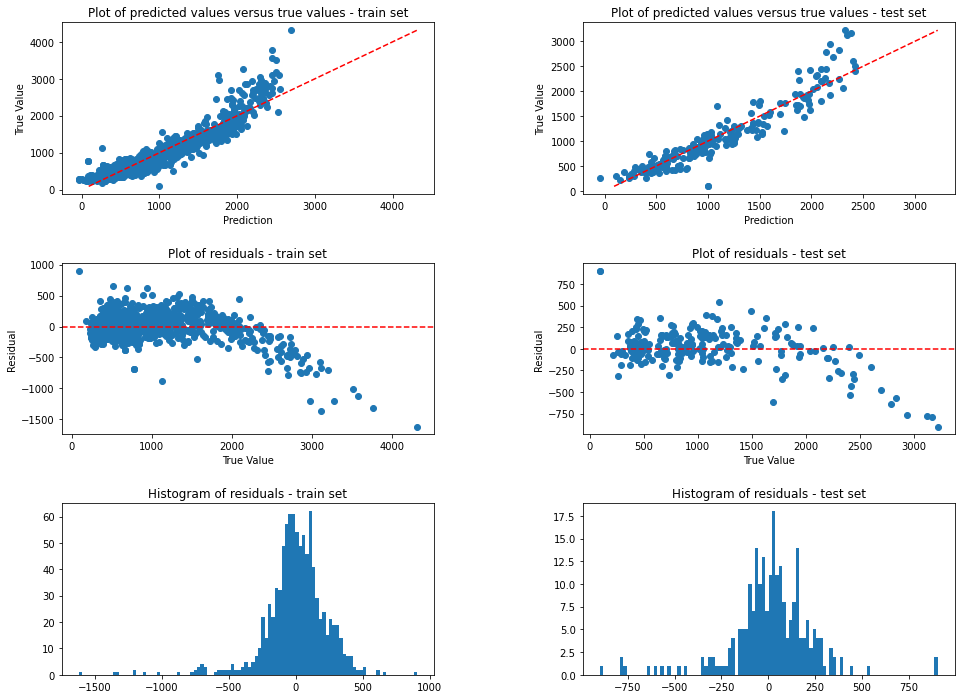

In [62]:
save_model(model = baseline_pipeline_Europe, name = 'baseline_pipeline_Europe')
model_evaluation(model = baseline_pipeline_Europe, name = 'baseline_pipeline_Europe',
                 X_test = X_test_Europe, X_train = X_train_Europe,
                 y_test = y_test_Europe, y_train = y_train_Europe,
                 metrics_data_frame = metrics_data_frame_Europe, type_df = 'Europe')

### Nafta

In [63]:
baseline_pipeline_Nafta = Pipeline(steps=[('preprocessor', transformer_Nafta),
                                          ('regression', LinearRegression())])

In [64]:
baseline_pipeline_Nafta.fit(X_train_Nafta, y_train_Nafta)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model baseline_pipeline_Nafta has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_pipeline_Nafta  161.018388       1024.98424    50.62272  164.085811   

                         Max_error_test  MAPE_test  
baseline_pipeline_Nafta      767.939544  48.881713

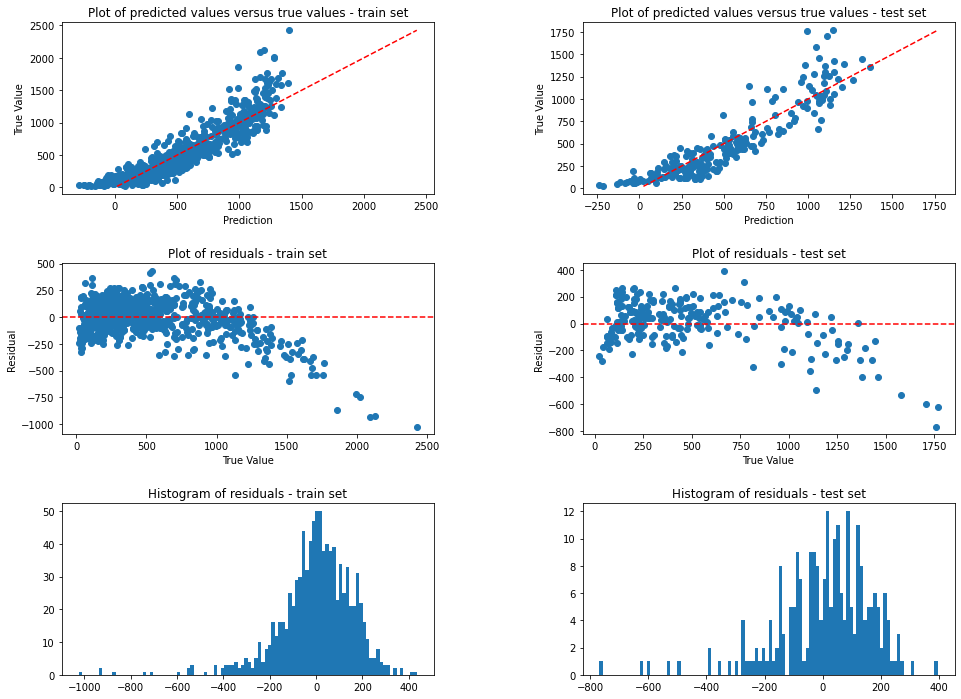

In [65]:
save_model(model = baseline_pipeline_Nafta, name = 'baseline_pipeline_Nafta')
model_evaluation(model = baseline_pipeline_Nafta, name = 'baseline_pipeline_Nafta',
                 X_test = X_test_Nafta, X_train = X_train_Nafta,
                 y_test = y_test_Nafta, y_train = y_train_Nafta,
                 metrics_data_frame = metrics_data_frame_Nafta, type_df = 'Nafta')

### Internet

In [66]:
baseline_pipeline_Internet = Pipeline(steps=[('preprocessor', transformer_Internet),
                                             ('regression', LinearRegression())])

In [67]:
baseline_pipeline_Internet.fit(X_train_Internet, y_train_Internet)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model baseline_pipeline_Internet has been saved


RMSE_train  Max_error_train  MAPE_train  \
baseline_pipeline_Internet  209.420578      2200.508682   28.627454   

                             RMSE_test  Max_error_test  MAPE_test  
baseline_pipeline_Internet  211.786194     1100.862798  29.403818

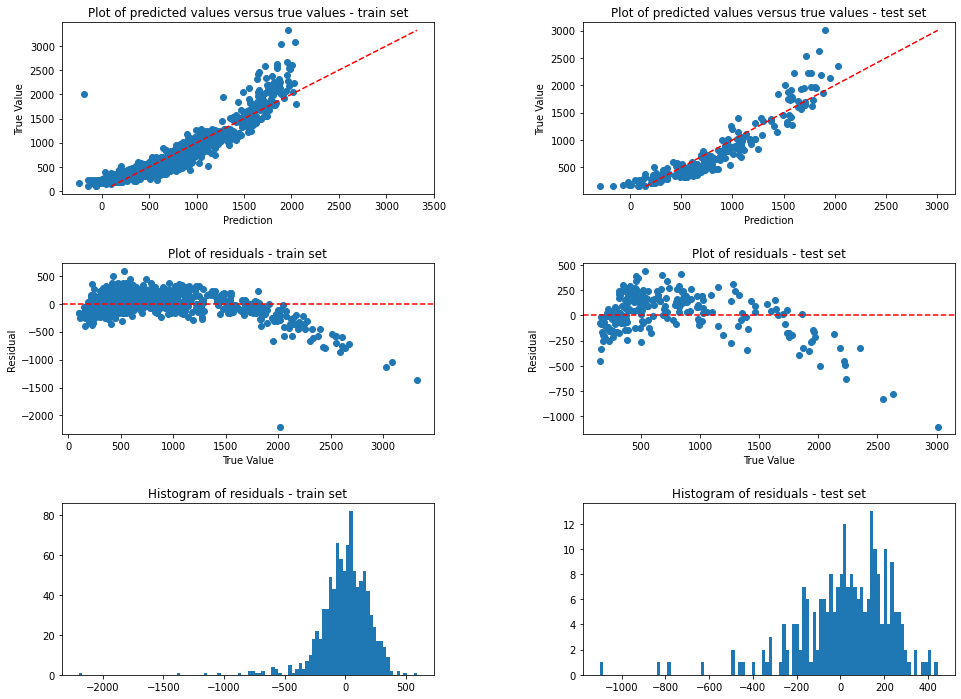

In [68]:
save_model(model = baseline_pipeline_Internet, name = 'baseline_pipeline_Internet')
model_evaluation(model = baseline_pipeline_Internet, name = 'baseline_pipeline_Internet',
                 X_test = X_test_Internet, X_train = X_train_Internet,
                 y_test = y_test_Internet, y_train = y_train_Internet,
                 metrics_data_frame = metrics_data_frame_Internet, type_df = 'Internet')

## 10.2 Polynomial Regression

### Europe

In [69]:
polynomial_regression_pipeline_Europe = Pipeline(steps=[('preprocessor', transformer_Europe),
                                                       ('polynomial_features',PolynomialFeatures(degree=3)),
                                                       ('regression_model', ElasticNet(alpha = 0.1,
                                                                                       l1_ratio = 0.5))])

In [70]:
n_startup_jobs = 128
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'polynomial_features__degree': hp.choice('polynomial_features__degree', np.arange(1, 4).tolist()),
    'regression_model__alpha': hp.loguniform ('regression_model__alpha', 0.0001, 10.0),
    'regression_model__l1_ratio': hp.uniform ('regression_model__l1_ratio', 0.0, 1.0),
}

def objective(space):
    polynomial_regression_pipeline_Europe_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'polynomial_features__degree': space['polynomial_features__degree'],
        'regression_model__alpha': space['regression_model__alpha'],
        'regression_model__l1_ratio': space['regression_model__l1_ratio'],
    }
    
    polynomial_regression_pipeline_Europe.set_params(**polynomial_regression_pipeline_Europe_params) 
    
    score = - cross_val_score(polynomial_regression_pipeline_Europe, X_train_Europe, y_train_Europe, cv=10,
                            scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

polynomial_regression_Europe = polynomial_regression_pipeline_Europe.set_params(**best_params)
polynomial_regression_Europe.fit(X_train_Europe, y_train_Europe)

100%|██████████| 256/256 [07:51<00:00,  1.84s/trial, best loss: 210.98961607029258]

The best params:
Parameter                                                    Selected
polynomial_features__degree                                  2
preprocessor__numerical__dim_red__n_components               0.8864847159703863
preprocessor__numerical__first_scaler                        MinMaxScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__alpha                                      1.044445192924455
regression_model__l1_ratio                                   0.8966885606086846


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model polynomial_regression_Europe has been saved


RMSE_train  Max_error_train  MAPE_train  \
baseline_pipeline_Europe      232.345334      1619.858160   20.713442   
polynomial_regression_Europe  202.204676      1541.411233   15.617914   

                               RMSE_test  Max_error_test  MAPE_test  
baseline_pipeline_Europe      220.784904      904.964815  24.363813  
polynomial_regression_Europe  203.052511      958.555358  20.979498

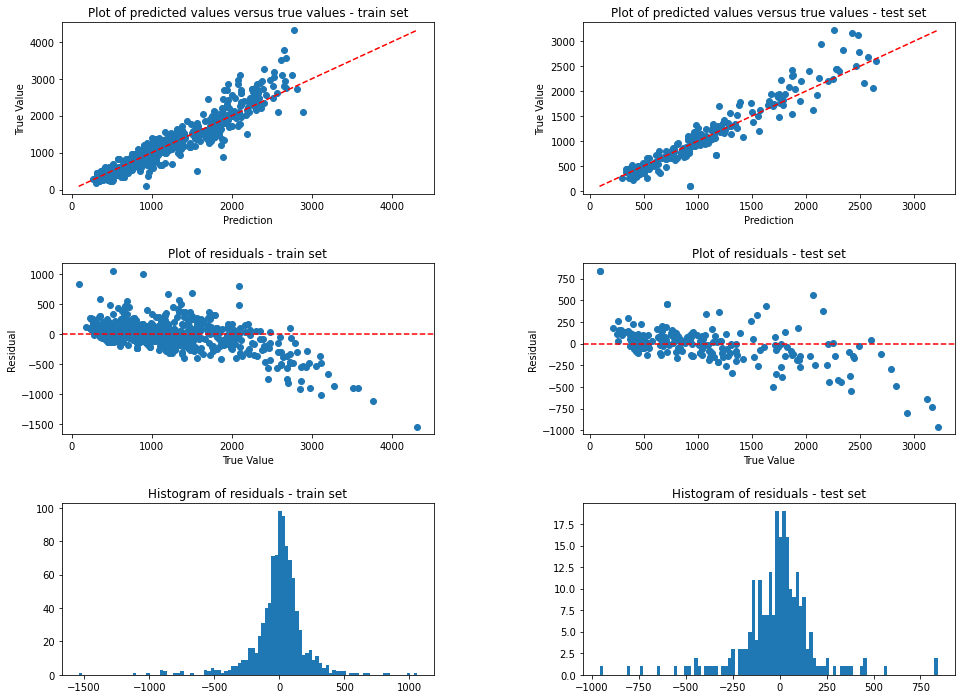

In [71]:
save_model(model = polynomial_regression_Europe, name = 'polynomial_regression_Europe')
model_evaluation(model = polynomial_regression_Europe, name = 'polynomial_regression_Europe',
                 X_test = X_test_Europe, X_train = X_train_Europe,
                 y_test = y_test_Europe, y_train = y_train_Europe,
                 metrics_data_frame = metrics_data_frame_Europe, type_df = 'Europe')

### Nafta

In [72]:
polynomial_regression_pipeline_Nafta = Pipeline(steps=[('preprocessor', transformer_Nafta),
                                                       ('polynomial_features',PolynomialFeatures(degree=3)),
                                                       ('regression_model', ElasticNet(alpha = 0.1,
                                                                                       l1_ratio = 0.5))])

In [73]:
n_startup_jobs = 128
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'polynomial_features__degree': hp.choice('polynomial_features__degree', np.arange(1, 4).tolist()),
    'regression_model__alpha': hp.loguniform ('regression_model__alpha', 0.0001, 10.0),
    'regression_model__l1_ratio': hp.uniform ('regression_model__l1_ratio', 0.0, 1.0),
}

def objective(space):
    polynomial_regression_pipeline_Nafta_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'polynomial_features__degree': space['polynomial_features__degree'],
        'regression_model__alpha': space['regression_model__alpha'],
        'regression_model__l1_ratio': space['regression_model__l1_ratio'],
    }
    
    polynomial_regression_pipeline_Nafta.set_params(**polynomial_regression_pipeline_Nafta_params) 
    
    score = - cross_val_score(polynomial_regression_pipeline_Nafta, X_train_Nafta, y_train_Nafta, cv=10,
                            scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

polynomial_regression_Nafta = polynomial_regression_pipeline_Nafta.set_params(**best_params)
polynomial_regression_Nafta.fit(X_train_Nafta, y_train_Nafta)

100%|██████████| 256/256 [07:31<00:00,  1.76s/trial, best loss: 144.89501634571093]

The best params:
Parameter                                                    Selected
polynomial_features__degree                                  2
preprocessor__numerical__dim_red__n_components               0.8916400907870955
preprocessor__numerical__first_scaler                        MinMaxScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__alpha                                      1.18152118762794
regression_model__l1_ratio                                   0.8528612387220946


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model polynomial_regression_Nafta has been saved


RMSE_train  Max_error_train  MAPE_train  \
baseline_pipeline_Nafta      161.018388      1024.984240   50.622720   
polynomial_regression_Nafta  137.923778      1081.716681   28.373202   

                              RMSE_test  Max_error_test  MAPE_test  
baseline_pipeline_Nafta      164.085811      767.939544  48.881713  
polynomial_regression_Nafta  150.633470      897.290139  28.100658

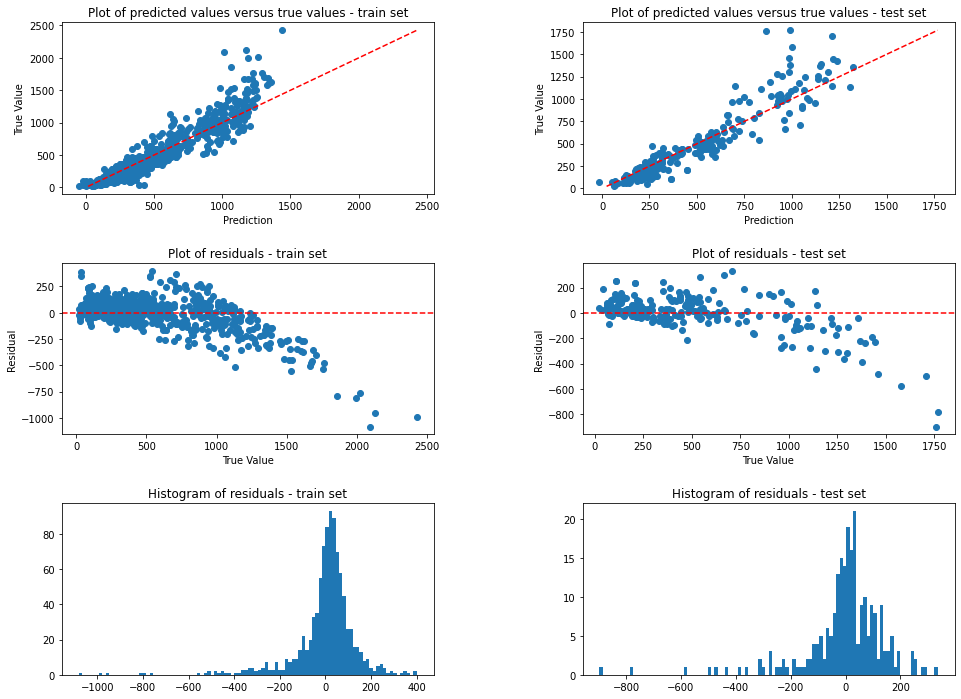

In [74]:
save_model(model = polynomial_regression_Nafta, name = 'polynomial_regression_Nafta')
model_evaluation(model = polynomial_regression_Nafta, name = 'polynomial_regression_Nafta',
                 X_test = X_test_Nafta, X_train = X_train_Nafta,
                 y_test = y_test_Nafta, y_train = y_train_Nafta,
                 metrics_data_frame = metrics_data_frame_Nafta, type_df = 'Nafta')

### Internet

In [75]:
polynomial_regression_pipeline_Internet = Pipeline(steps=[('preprocessor', transformer_Internet),
                                                       ('polynomial_features',PolynomialFeatures(degree=3)),
                                                       ('regression_model', ElasticNet(alpha = 0.1,
                                                                                       l1_ratio = 0.5))])

In [76]:
n_startup_jobs = 128
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'polynomial_features__degree': hp.choice('polynomial_features__degree', np.arange(1, 4).tolist()),
    'regression_model__alpha': hp.loguniform ('regression_model__alpha', 0.0001, 10.0),
    'regression_model__l1_ratio': hp.uniform ('regression_model__l1_ratio', 0.0, 1.0),
}

def objective(space):
    polynomial_regression_pipeline_Internet_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'polynomial_features__degree': space['polynomial_features__degree'],
        'regression_model__alpha': space['regression_model__alpha'],
        'regression_model__l1_ratio': space['regression_model__l1_ratio'],
    }
    
    polynomial_regression_pipeline_Internet.set_params(**polynomial_regression_pipeline_Internet_params) 
    
    score = - cross_val_score(polynomial_regression_pipeline_Internet, X_train_Internet, y_train_Internet, cv=10,
                            scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

polynomial_regression_Internet = polynomial_regression_pipeline_Internet.set_params(**best_params)
polynomial_regression_Internet.fit(X_train_Internet, y_train_Internet)

100%|██████████| 256/256 [08:29<00:00,  1.99s/trial, best loss: 159.14247714240253]

The best params:
Parameter                                                    Selected
polynomial_features__degree                                  3
preprocessor__numerical__dim_red__n_components               0.8574928860196525
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__alpha                                      1.239861587076268
regression_model__l1_ratio                                   0.44603154237223785


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_uint_columns',
                                                

The model polynomial_regression_Internet has been saved


RMSE_train  Max_error_train  MAPE_train  \
baseline_pipeline_Internet      209.420578      2200.508682   28.627454   
polynomial_regression_Internet  133.242684       971.155021   15.762501   

                                 RMSE_test  Max_error_test  MAPE_test  
baseline_pipeline_Internet      211.786194     1100.862798  29.403818  
polynomial_regression_Internet  148.056234      724.342250  16.475412

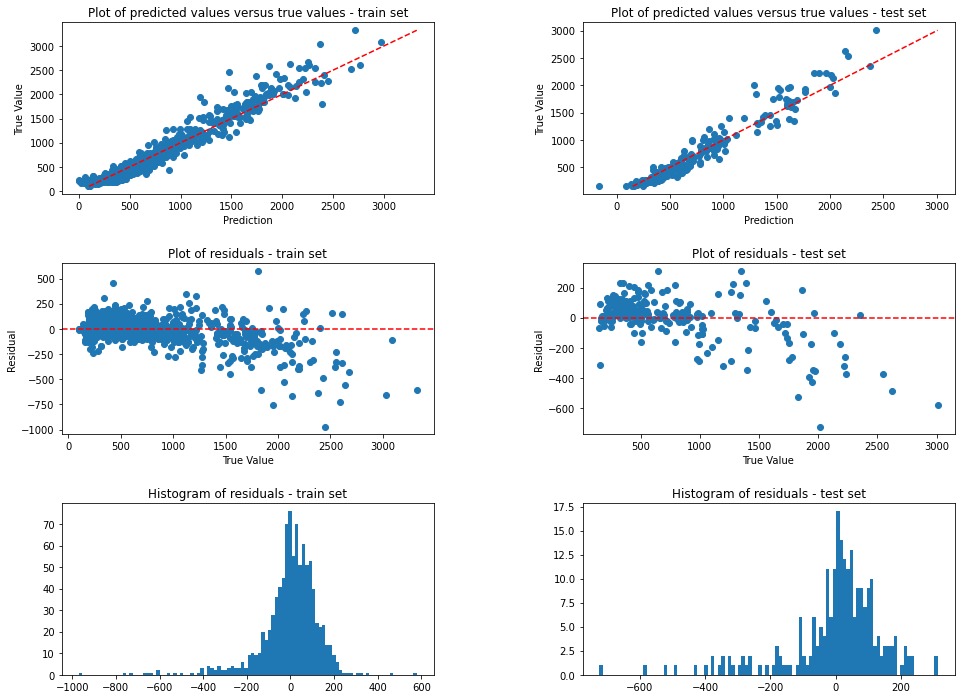

In [77]:
save_model(model = polynomial_regression_Internet, name = 'polynomial_regression_Internet')
model_evaluation(model = polynomial_regression_Internet, name = 'polynomial_regression_Internet',
                 X_test = X_test_Internet, X_train = X_train_Internet,
                 y_test = y_test_Internet, y_train = y_train_Internet,
                 metrics_data_frame = metrics_data_frame_Internet, type_df = 'Internet')

## 10.3 Random Forest Regression

### Europe

In [78]:
random_forest_regression_pipeline_Europe = Pipeline(steps=[('preprocessor', transformer_Europe),
                                                    ('regression_model', RandomForestRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 16).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 100).tolist()),
}

def objective(space):
    random_forest_regression_params_Europe = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    random_forest_regression_pipeline_Europe.set_params(**random_forest_regression_params_Europe) 
    
    score = - cross_val_score(random_forest_regression_pipeline_Europe, X_train_Europe, y_train_Europe, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

random_forest_regression_Europe = random_forest_regression_pipeline_Europe.set_params(**best_params_Europe)
random_forest_regression_Europe.fit(X_train_Europe, y_train_Europe)

 86%|████████▌ | 110/128 [27:22<06:30, 21.69s/trial, best loss: 206.20004535181562]

In [ ]:
save_model(model = random_forest_regression_Europe, name = 'random_forest_regression_Europe')
model_evaluation(model = random_forest_regression_Europe, name = 'random_forest_regression_Europe',
                 X_test = X_test_Europe, X_train = X_train_Europe,
                 y_test = y_test_Europe, y_train = y_train_Europe,
                 metrics_data_frame = metrics_data_frame_Europe, type_df = 'Europe')

### Nafta

In [ ]:
random_forest_regression_pipeline_Nafta = Pipeline(steps=[('preprocessor', transformer_Nafta),
                                                    ('regression_model', RandomForestRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 16).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 100).tolist()),
}

def objective(space):
    random_forest_regression_params_Nafta = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    random_forest_regression_pipeline_Nafta.set_params(**random_forest_regression_params_Nafta) 
    
    score = - cross_val_score(random_forest_regression_pipeline_Nafta, X_train_Nafta, y_train_Nafta, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

random_forest_regression_Nafta = random_forest_regression_pipeline_Nafta.set_params(**best_params_Nafta)
random_forest_regression_Nafta.fit(X_train_Nafta, y_train_Nafta)

In [ ]:
save_model(model = random_forest_regression_Nafta, name = 'random_forest_regression_Nafta')
model_evaluation(model = random_forest_regression_Nafta, name = 'random_forest_regression_Nafta',
                 X_test = X_test_Nafta, X_train = X_train_Nafta,
                 y_test = y_test_Nafta, y_train = y_train_Nafta,
                 metrics_data_frame = metrics_data_frame_Nafta, type_df = 'Nafta')

### Internet

In [ ]:
random_forest_regression_pipeline_Internet = Pipeline(steps=[('preprocessor', transformer_Internet),
                                                    ('regression_model', RandomForestRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 16).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 100).tolist()),
}

def objective(space):
    random_forest_regression_params_Internet = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    random_forest_regression_pipeline_Internet.set_params(**random_forest_regression_params_Internet) 
    
    score = - cross_val_score(random_forest_regression_pipeline_Internet, X_train_Internet, y_train_Internet, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

random_forest_regression_Internet = random_forest_regression_pipeline_Internet.set_params(**best_params_Internet)
random_forest_regression_Internet.fit(X_train_Internet, y_train_Internet)

In [ ]:
save_model(model = random_forest_regression_Internet, name = 'random_forest_regression_Internet')
model_evaluation(model = random_forest_regression_Internet, name = 'random_forest_regression_Internet',
                 X_test = X_test_Internet, X_train = X_train_Internet,
                 y_test = y_test_Internet, y_train = y_train_Internet,
                 metrics_data_frame = metrics_data_frame_Internet, type_df = 'Internet')

## 10.5 Extra Trees Regression

### Europe

In [ ]:
extra_trees_regression_pipeline_Europe = Pipeline(steps=[('preprocessor', transformer_Europe),
                                                  ('regression_model', ExtraTreesRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 51).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 50).tolist()),
}

def objective(space):
    extra_trees_regression_params_Europe = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    extra_trees_regression_pipeline_Europe.set_params(**extra_trees_regression_params_Europe) 
    
    score = - cross_val_score(extra_trees_regression_pipeline_Europe, X_train_Europe, y_train_Europe, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

extra_trees_regression_Europe = extra_trees_regression_pipeline_Europe.set_params(**best_params_Europe)
extra_trees_regression_Europe.fit(X_train_Europe, y_train_Europe)

In [ ]:
save_model(model = extra_trees_regression_Europe, name = 'extra_trees_regression_Europe')
model_evaluation(model = extra_trees_regression_Europe, name = 'extra_trees_regression_Europe',
                 X_test = X_test_Europe, X_train = X_train_Europe,
                 y_test = y_test_Europe, y_train = y_train_Europe,
                 metrics_data_frame = metrics_data_frame_Europe, type_df = 'Europe')

### Nafta

In [ ]:
extra_trees_regression_pipeline_Nafta = Pipeline(steps=[('preprocessor', transformer_Nafta),
                                                  ('regression_model', ExtraTreesRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 51).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 50).tolist()),
}

def objective(space):
    extra_trees_regression_params_Nafta = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    extra_trees_regression_pipeline_Nafta.set_params(**extra_trees_regression_params_Nafta) 
    
    score = - cross_val_score(extra_trees_regression_pipeline_Nafta, X_train_Nafta, y_train_Nafta, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

extra_trees_regression_Nafta = extra_trees_regression_pipeline_Nafta.set_params(**best_params_Nafta)
extra_trees_regression_Nafta.fit(X_train_Nafta, y_train_Nafta)

In [ ]:
save_model(model = extra_trees_regression_Nafta, name = 'extra_trees_regression_Nafta')
model_evaluation(model = extra_trees_regression_Nafta, name = 'extra_trees_regression_Nafta',
                 X_test = X_test_Nafta, X_train = X_train_Nafta,
                 y_test = y_test_Nafta, y_train = y_train_Nafta,
                 metrics_data_frame = metrics_data_frame_Nafta, type_df = 'Nafta')

### Internet

In [ ]:
extra_trees_regression_pipeline_Internet = Pipeline(steps=[('preprocessor', transformer_Internet),
                                                  ('regression_model', ExtraTreesRegressor(n_jobs = -1))])

In [ ]:
n_startup_jobs = 64
 

max_evals = 128 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 51).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 50).tolist()),
}

def objective(space):
    extra_trees_regression_params_Internet = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    extra_trees_regression_pipeline_Internet.set_params(**extra_trees_regression_params_Internet) 
    
    score = - cross_val_score(extra_trees_regression_pipeline_Internet, X_train_Internet, y_train_Internet, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

extra_trees_regression_Internet = extra_trees_regression_pipeline_Internet.set_params(**best_params_Internet)
extra_trees_regression_Internet.fit(X_train_Internet, y_train_Internet)

In [ ]:
save_model(model = extra_trees_regression_Internet, name = 'extra_trees_regression_Internet')
model_evaluation(model = extra_trees_regression_Internet, name = 'extra_trees_regression_Internet',
                 X_test = X_test_Internet, X_train = X_train_Internet,
                 y_test = y_test_Internet, y_train = y_train_Internet,
                 metrics_data_frame = metrics_data_frame_Internet, type_df = 'Internet')

## 10.6 Support Vector Regression

### Europe

In [44]:
svr_regression_pipeline_Europe = Pipeline(steps=[('preprocessor', transformer_Europe),
                                          ('regression_model', SVR(kernel='rbf'))])

In [45]:
n_startup_jobs = 128
 
max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__C': hp.uniform ('regression_model__C', 1.0, 50000.0),
    'regression_model__epsilon': hp.uniform ('regression_model__epsilon', 0.0001, 0.5),
    'regression_model__gamma': hp.uniform ('regression_model__gamma', 0.0001, 100.0)
}

def objective(space):
    svr_regression_params_Europe = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__C': space['regression_model__C'],
        'regression_model__epsilon': space['regression_model__epsilon'],
        'regression_model__gamma': space['regression_model__gamma'],

    }
    
    svr_regression_pipeline_Europe.set_params(**svr_regression_params_Europe) 
    
    score = - cross_val_score(svr_regression_pipeline_Europe, X_train_Europe, y_train_Europe, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

svr_regression_Europe = svr_regression_pipeline_Europe.set_params(**best_params)
svr_regression_Europe.fit(X_train_Europe, y_train_Europe)

100%|██████████| 1024/1024 [1:29:23<00:00,  5.24s/trial, best loss: 120.36204973024046] 

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.8937308770861966
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__C                                          48937.71695061231
regression_model__epsilon                                    0.4659318072939999
regression_model__gamma                                      0.04795392864592436


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model svr_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     127.293690      1147.640439   20.478127  153.408203   
random_forest_regression  145.210933      1056.041934   25.261679  197.884508   
extra_trees_regression    151.952393      1094.694243   26.365071  179.817882   
svr_regression             60.171321       624.646523    3.011601  104.299046   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1194.594231  21.677576  
random_forest_regression     1622.885302  25.472212  
extra_trees_regression       1056.247748  25.050244  
svr_regression                519.683565  13.266188

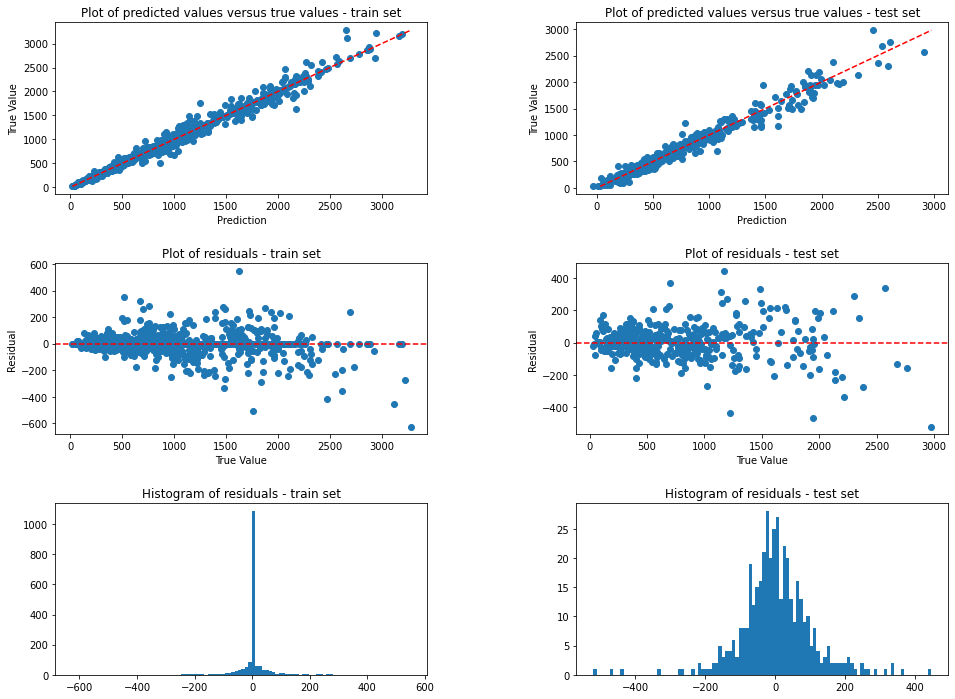

In [46]:
save_model(model = svr_regression, name = 'svr_regression')
model_evaluation(model = svr_regression, name = 'svr_regression')

### Nafta

### Internet

## 10.7 AdaBoost Regression

In [47]:
adaboost_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                          ('regression_model',
                                           AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                                                             n_estimators=500, learning_rate=0.5,
                                                             random_state = 123))])

In [48]:
n_startup_jobs = 256
 

max_evals = 1024 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(100, 1100, 100).tolist()),
    'regression_model__learning_rate': hp.loguniform ('regression_model__learning_rate', 0.01, 0.9),
    'regression_model__base_estimator__max_depth': hp.choice('regression_model__base_estimator__max_depth',
                                                             np.arange(2, 21).tolist()),
    'regression_model__base_estimator__max_leaf_nodes': hp.choice(
                                                        'regression_model__base_estimator__max_leaf_nodes',
                                                        np.arange(5, 31).tolist()),
}

def objective(space):
    adaboost_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
        'regression_model__learning_rate': space['regression_model__learning_rate'],
        'regression_model__base_estimator__max_depth': space['regression_model__base_estimator__max_depth'],
        'regression_model__base_estimator__max_leaf_nodes': space[
                                                            'regression_model__base_estimator__max_leaf_nodes'],
    }
    
    adaboost_regression_pipeline.set_params(**adaboost_regression_params) 
    
    score = - cross_val_score(adaboost_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

adaboost_regression = adaboost_regression_pipeline.set_params(**best_params)
adaboost_regression.fit(X_train, y_train)

100%|██████████| 1024/1024 [3:36:56<00:00, 12.71s/trial, best loss: 161.76605622491815]  

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.9999059958521527
preprocessor__numerical__first_scaler                        MinMaxScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__base_estimator__max_depth                  14
regression_model__base_estimator__max_leaf_nodes             29
regression_model__learning_rate                              1.708945175657737
regression_model__n_estimators                               800


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model adaboost_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     127.293690      1147.640439   20.478127  153.408203   
random_forest_regression  145.210933      1056.041934   25.261679  197.884508   
extra_trees_regression    151.952393      1094.694243   26.365071  179.817882   
svr_regression             60.171321       624.646523    3.011601  104.299046   
adaboost_regression       113.311737       253.015873   33.560223  154.935765   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1194.594231  21.677576  
random_forest_regression     1622.885302  25.472212  
extra_trees_regression       1056.247748  25.050244  
svr_regression                519.683565  13.266188  
adaboost_regression           781.582418  33.069242

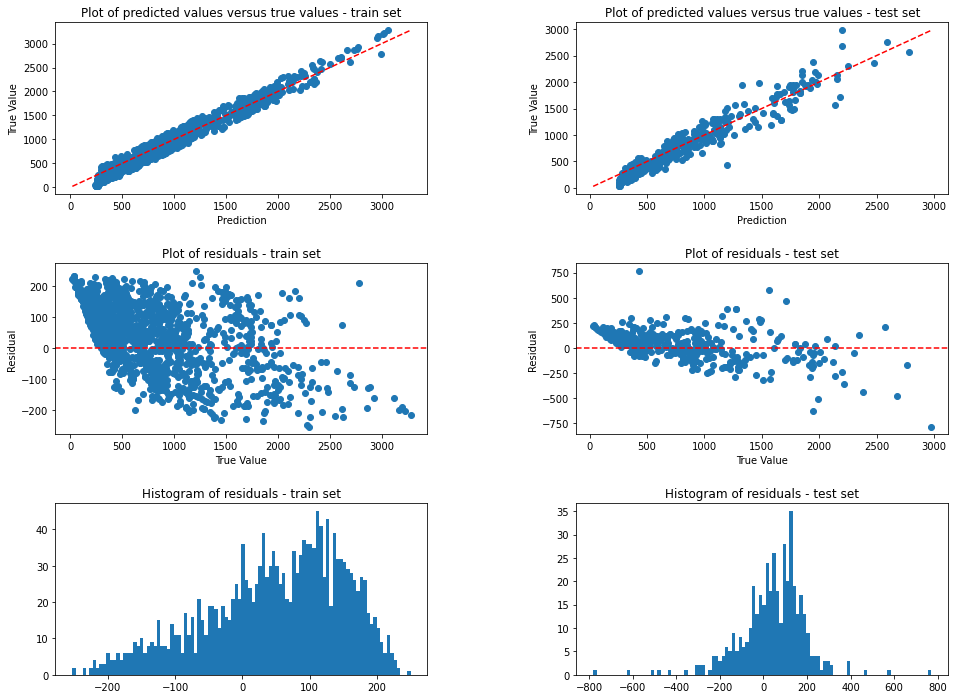

In [49]:
save_model(model = adaboost_regression, name = 'adaboost_regression')
model_evaluation(model = adaboost_regression, name = 'adaboost_regression')

## 10.8 XGBoost Regression

In [50]:
xgboost_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                          ('regression_model', xgb.XGBRegressor(n_estimators=3, learning_rate=0.5,
                                                                                random_state=123))])

In [51]:
n_startup_jobs = 512
 

max_evals = 1024 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [None, StandardScaler(), MinMaxScaler()]),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(100, 1100, 100).tolist()),
    'regression_model__learning_rate': hp.loguniform ('regression_model__learning_rate', 0.01, 0.5),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 11).tolist()),
    'regression_model__min_child_weight': hp.choice('regression_model__min_child_weight',
                                                    np.arange(0, 101).tolist()),
    'regression_model__gamma': hp.loguniform('regression_model__gamma', 0.0, 2.0),
    'regression_model__subsample': hp.uniform('regression_model__subsample', 0.5, 1.0),
    'regression_model__colsample_bytree': hp.uniform('regression_model__colsample_bytree', 0.5, 1.0),
    'regression_model__colsample_bylevel': hp.uniform('regression_model__colsample_bylevel', 0.5, 1.0),
    'regression_model__reg_alpha': hp.loguniform('regression_model__reg_alpha', 0.0, 2.0),
    'regression_model__reg_lambda': hp.loguniform('regression_model__reg_lambda', 0.0, 2.0),
}

def objective(space):
    xgboost_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
        'regression_model__learning_rate': space['regression_model__learning_rate'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_child_weight': space['regression_model__min_child_weight'],
        'regression_model__gamma': space['regression_model__gamma'],
        'regression_model__subsample': space['regression_model__subsample'],
        'regression_model__colsample_bytree': space['regression_model__colsample_bytree'],
        'regression_model__colsample_bylevel': space['regression_model__colsample_bylevel'],
        'regression_model__reg_alpha': space['regression_model__reg_alpha'],
        'regression_model__reg_lambda': space['regression_model__reg_lambda'],
    }
    
    xgboost_regression_pipeline.set_params(**xgboost_regression_params) 
    
    score = - cross_val_score(xgboost_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

xgboost_regression = xgboost_regression_pipeline.set_params(**best_params)
xgboost_regression.fit(X_train, y_train)

100%|██████████| 1024/1024 [1:51:01<00:00,  6.51s/trial, best loss: 170.65741040023747] 

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.939110568361269
preprocessor__numerical__first_scaler                        MinMaxScaler()
preprocessor__numerical__log_transform                       LogTransformer()
preprocessor__numerical__second_scaler                       MinMaxScaler()
regression_model__colsample_bylevel                          0.8932791830399667
regression_model__colsample_bytree                           0.6414328125828018
regression_model__gamma                                      3.0237611369384836
regression_model__learning_rate                              1.047502193244916
regression_model__max_depth                                  2
regression_model__min_child_weight                           87
regression_model__n_estimators                               400
reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                              int

The model xgboost_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     127.293690      1147.640439   20.478127  153.408203   
random_forest_regression  145.210933      1056.041934   25.261679  197.884508   
extra_trees_regression    151.952393      1094.694243   26.365071  179.817882   
svr_regression             60.171321       624.646523    3.011601  104.299046   
adaboost_regression       113.311737       253.015873   33.560223  154.935765   
xgboost_regression         78.541520       462.420654   13.026779  173.190774   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1194.594231  21.677576  
random_forest_regression     1622.885302  25.472212  
extra_trees_regression       1056.247748  25.050244  
svr_regression                519.683565  13.266188  
adaboost_regression           781.582418  33.069242  
xgboost_regression           1168.851440  24.982381

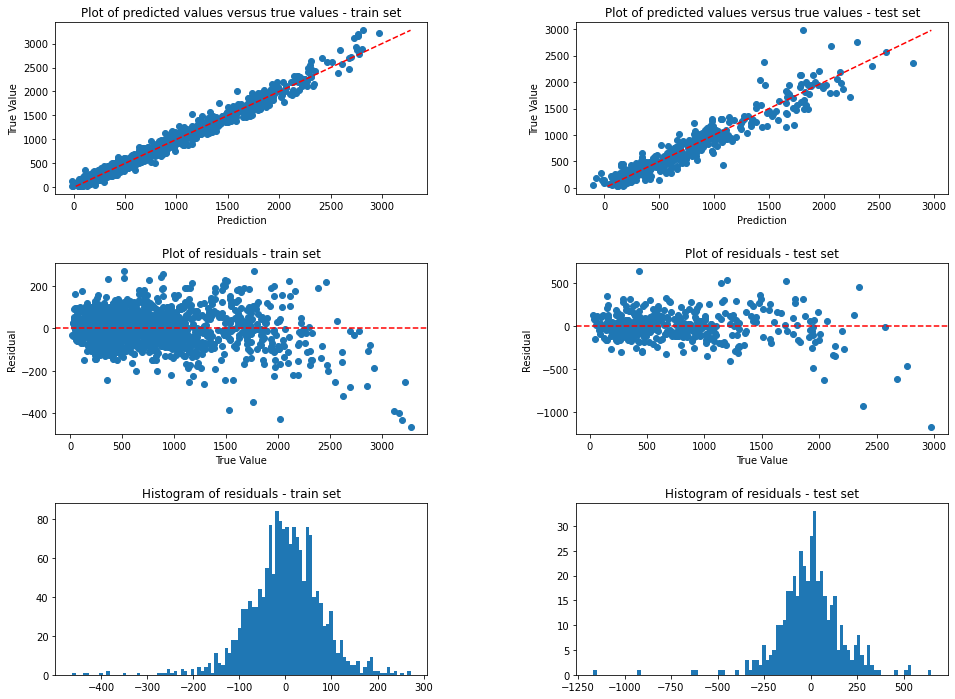

In [52]:
save_model(model = xgboost_regression, name = 'xgboost_regression')
model_evaluation(model = xgboost_regression, name = 'xgboost_regression')

# 11. Summary

The results were not satisfactory, which could be due to small data and many variables. It took a lot of time to prepare the scripts to create the data set. You could use a different approach and prepare 9 models, so for each product and area separate. But the models allowed my team to reach the national final.